<a href="https://colab.research.google.com/github/baradmukta/Regression-Capstone-Project---2/blob/main/regression_capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title : Seoul Bike Sharing Demand Prediction </b>
**Individual Project:**

 * Mukta Rajesh Barad.

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understand the data
4. Data cleaning
5. Exploratory data analysis
6. Feature selection
7. Data preprocessing
8. ML model implementation
9. Results
10. Model Explainability
11. Summary and conclusions

###**Github Link:**

https://github.com/baradmukta/Regression-Capstone-Project---2



# **1. Problem Statement:**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

### <b> Data Description </b>

##### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ##### Date : year-month-day
* ##### Rented Bike count - Count of bikes rented at each hour
* ##### Hour - Hour of the day
* ##### Temperature-Temperature in Celsius
* ##### Humidity - %
* ##### Windspeed - m/s
* ##### Visibility - 10m
* ##### Dew point temperature - Celsius
* ##### Solar radiation - MJ/m2
* ##### Rainfall - mm
* ##### Snowfall - cm
* ##### Seasons - Winter, Spring, Summer, Autumn
* ##### Holiday - Holiday/No holiday
* ##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **2. Importing the libraries and the dataset**

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [2]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

#load and read the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin')
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

#**3. Understand the data**

In [4]:
#Getting the shape of dataset with rows and columns
print(bike_df.shape)

(8760, 14)


In [5]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
# checking the null value counts
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


**Why do we need to handle missing values?**
* *The real-world data often has a lot of missing values. the cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.*
* *As we can see above there are no missing value presents thankfully.* 

In [9]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Why is it important to remove duplicate records from my data?** 
* **"Duplication"** just means that you have repeated data in your dataset. This **could be due to things like data entry errors or data collection methods**. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

In [10]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().astype(int).T

count  mean  std  min  25%   50%   75%   max
Rented Bike Count           8760   704  644    0  191   504  1065  3556
Hour                        8760    11    6    0    5    11    17    23
Temperature(°C)             8760    12   11  -17    3    13    22    39
Humidity(%)                 8760    58   20    0   42    57    74    98
Wind speed (m/s)            8760     1    1    0    0     1     2     7
Visibility (10m)            8760  1436  608   27  940  1698  2000  2000
Dew point temperature(°C)   8760     4   13  -30   -4     5    14    27
Solar Radiation (MJ/m2)     8760     0    0    0    0     0     0     3
Rainfall(mm)                8760     0    1    0    0     0     0    35
Snowfall (cm)               8760     0    0    0    0     0     0     8

* This Dataset contains **8760 lines** and **14 columns**.
* In a day we have **24 hours** and we have **365 days** a year so  **365*24 = 8760**, which represents the number of line in the dataset.means we have the data of whole year. 

##Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


In [11]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking date column
* Spliting Date column which is in string format into year, month, day as a category data type.

In [12]:

# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()


In [13]:
#Observing the pattern of data
bike_df.iloc[30:35,:]

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
30 2017-12-02                 70     6         -4.3        82         2.1   
31 2017-12-02                146     7         -4.4        81         2.5   
32 2017-12-02                219     8         -4.2        79         2.1   
33 2017-12-02                328     9         -2.9        68         1.6   
34 2017-12-02                334    10         -0.4        57         1.6   

    Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
30        1178                   -6.9             0.00       0.0       0.0   
31        1276                   -7.1             0.00       0.0       0.0   
32        1436                   -7.3             0.01       0.0       0.0   
33        1487                   -7.9             0.30       0.0       0.0   
34        1309                   -7.8             0.80       0.0       0.0   

   Seasons     Holiday Functioning_Day  year  month       day  
30  Winter  No Holiday             Yes  2017     12  Saturday  
31  Winter  No Holiday             Yes  2017     12  Saturday  
32  Winter  No Holiday             Yes  2017     12  Saturday  
33  Winter  No Holiday             Yes  2017     12  Saturday  
34  Winter  No Holiday             Yes  2017     12  Saturday

In [14]:

#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [15]:
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [16]:
#counting the value 
print(bike_df['Functioning_Day'].value_counts())
print(bike_df['weekdays_weekend'].value_counts())

Yes    8465
No      295
Name: Functioning_Day, dtype: int64
0    6264
1    2496
Name: weekdays_weekend, dtype: int64


* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column is basically contain **from 2017 december to 2018 november i.e. one year** **we don't need the "year" column so we drop it**. 
* The other column "day", it contains the each day of the month,we don't need each day of each month data but we need the data about, **if a day is a weekday or a weekend** so we convert it into this format and **drop the "day" column**.

###**Changing data type**

In [17]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for i in cols:
  bike_df[i]=bike_df[i].astype('category')

#**5. Exploratory data analysis**

## **Univariate Analysis**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***
* ***Our dependent variable is "Rented Bike Count" so we need to analyse this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

####**Analysis of Categorical data by visualization**
* ***Month***      
* ***weekdays_weekend***
* ***Hour***
* ***Functioning Day***
* ***Season***
* ***Holiday*** 


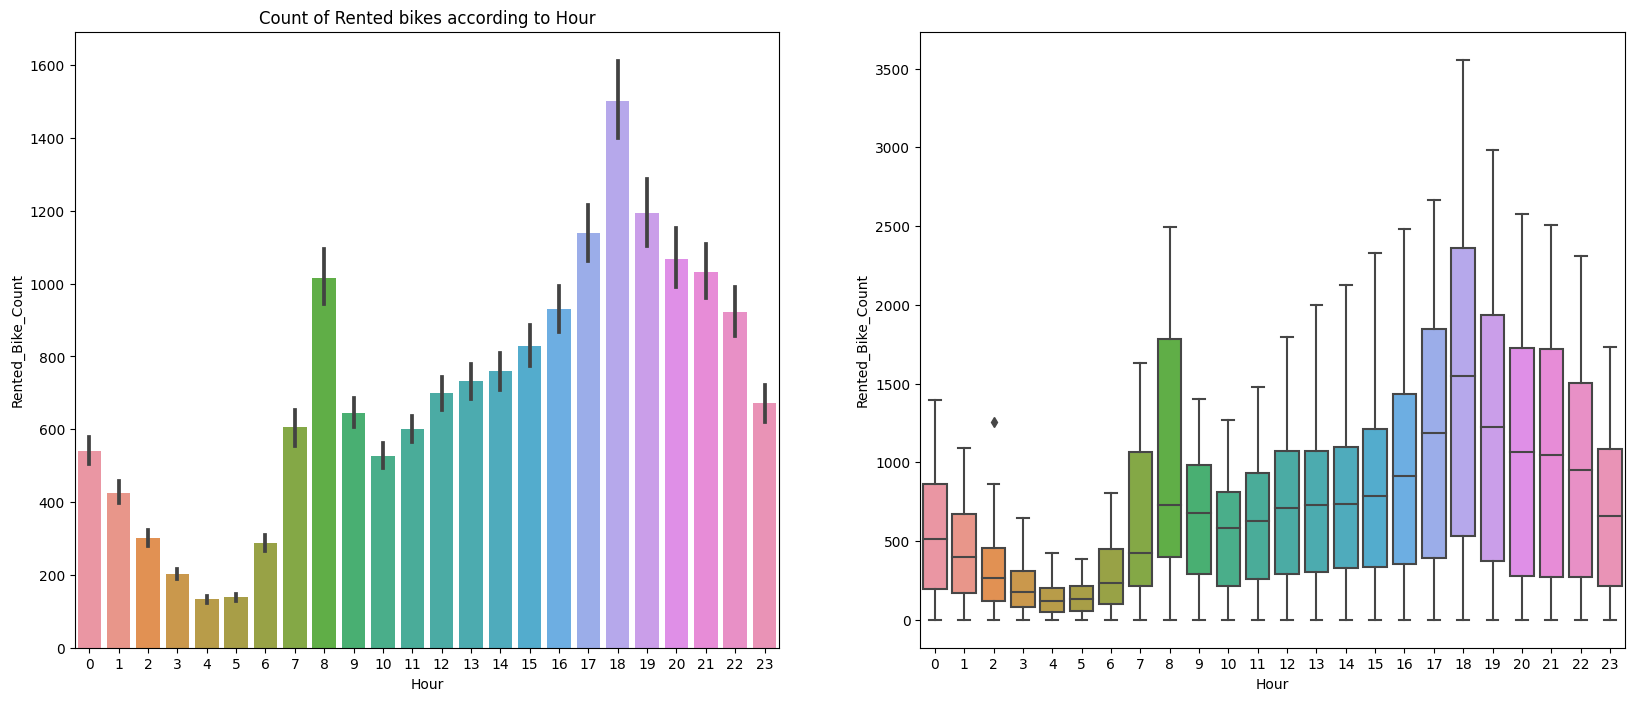

In [18]:
#Visualization by Hour category
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Count of Rented bikes according to Hour')
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count');

plt.subplot(1,2,2)
sns.boxplot(data=bike_df,x='Hour',y='Rented_Bike_Count');

* ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 9pm.***   

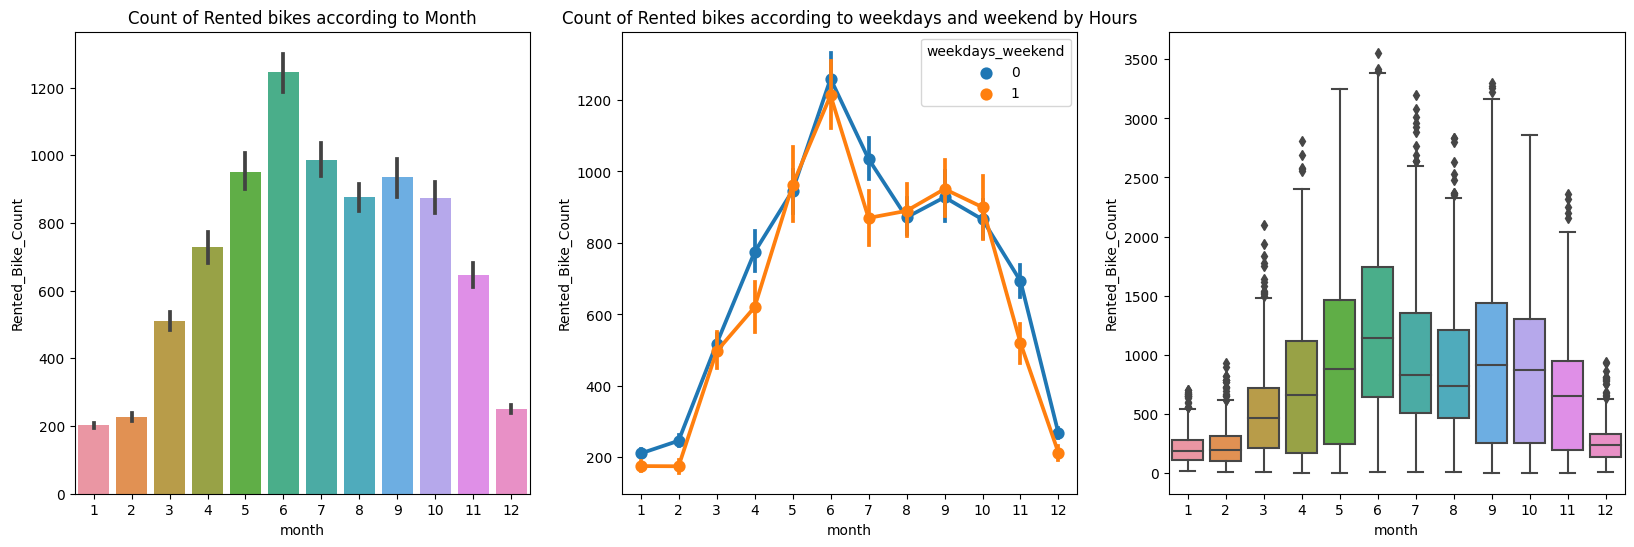

In [19]:
#Visualization by Month category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Month')
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count');

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to weekdays and weekend by Hours')
sns.pointplot(data=bike_df,x='month',y='Rented_Bike_Count',hue='weekdays_weekend');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='month',y='Rented_Bike_Count');

* ***From the above bar plot we can clearly say that, the demand of the rented bike is high in May, June, July, August, September as compare to other months.these months are comes inside the summer season.***

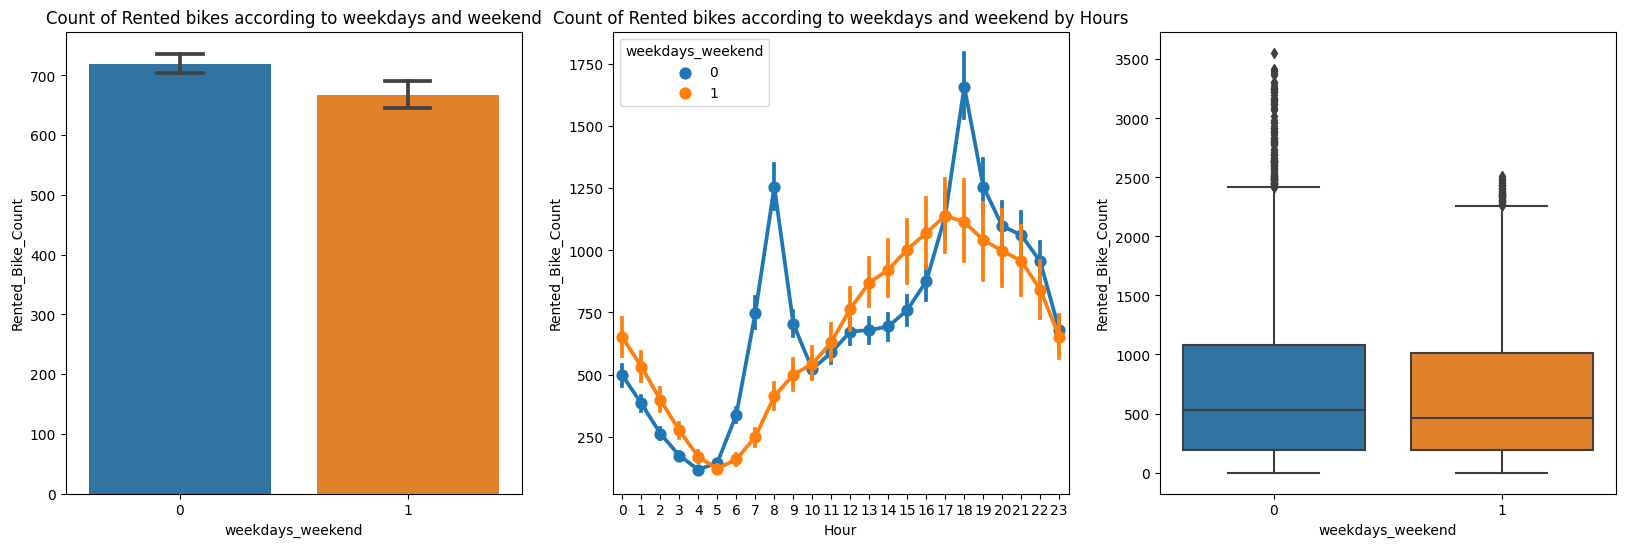

In [20]:
#Visualization by weekdays and weekend category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to weekdays and weekend')
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to weekdays and weekend by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count');

* ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 9 pm on weekdays for rented bikes**
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but from 4 pm to 8 pm the demand slightly increases.** 

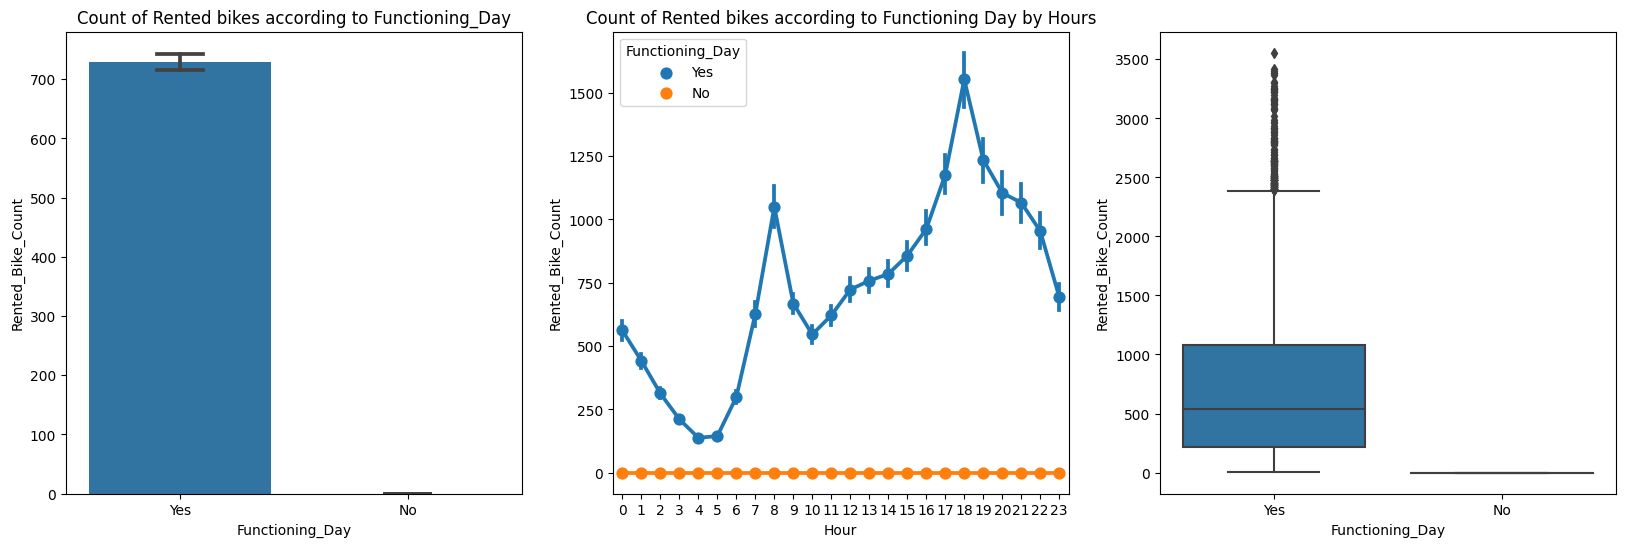

In [21]:

#Visualization by Functioning Day category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Functioning_Day')
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to Functioning Day by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,***
* ***Peoples use rented bikes mostly on functioning day.***

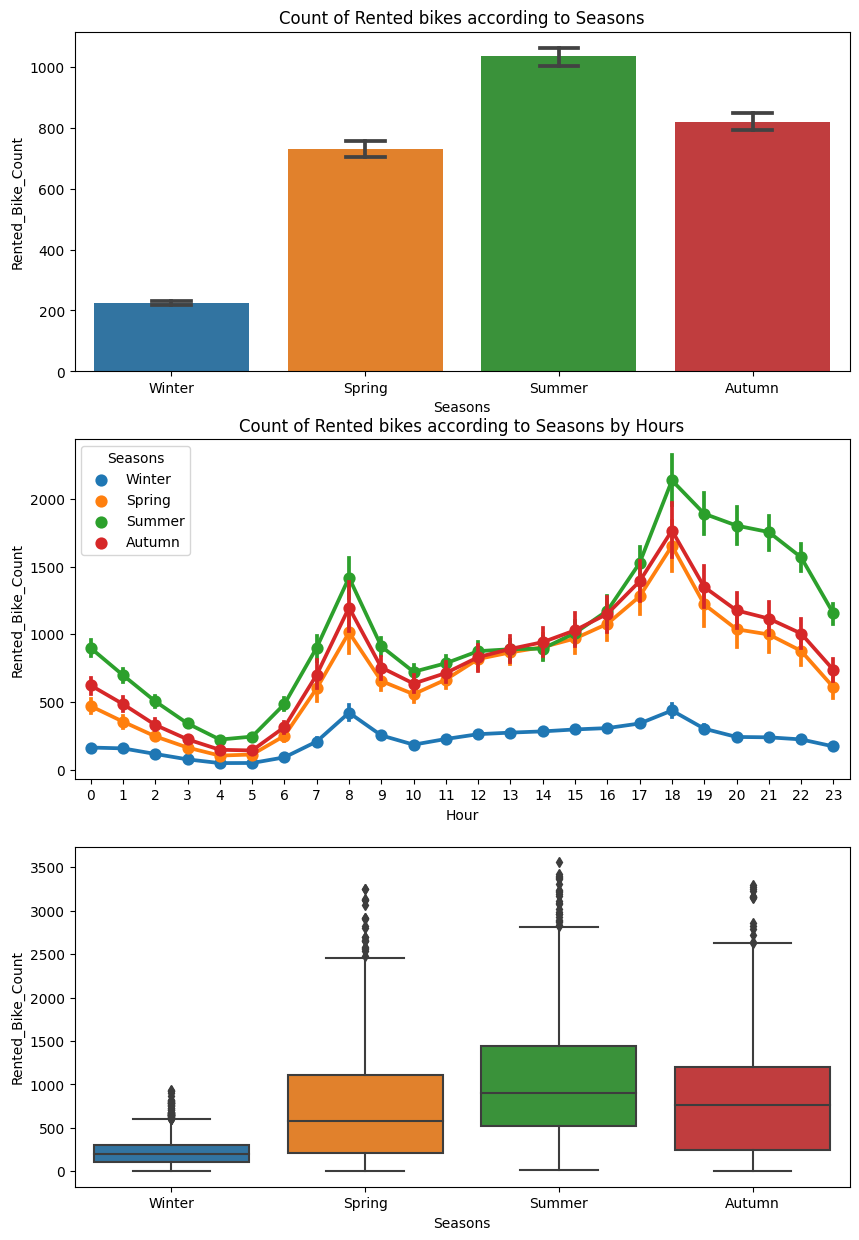

In [22]:
#Visualization by Season category
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.title('Count of Rented bikes according to Seasons')
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',capsize=.2);

plt.subplot(3,1,2)
plt.title('Count of Rented bikes according to Seasons by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons');

plt.subplot(3,1,3)
sns.boxplot(data=bike_df,x='Seasons',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-9pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***
* ***graph of Spring, Summer, Autumn Season showing similar trend in rented bikes***

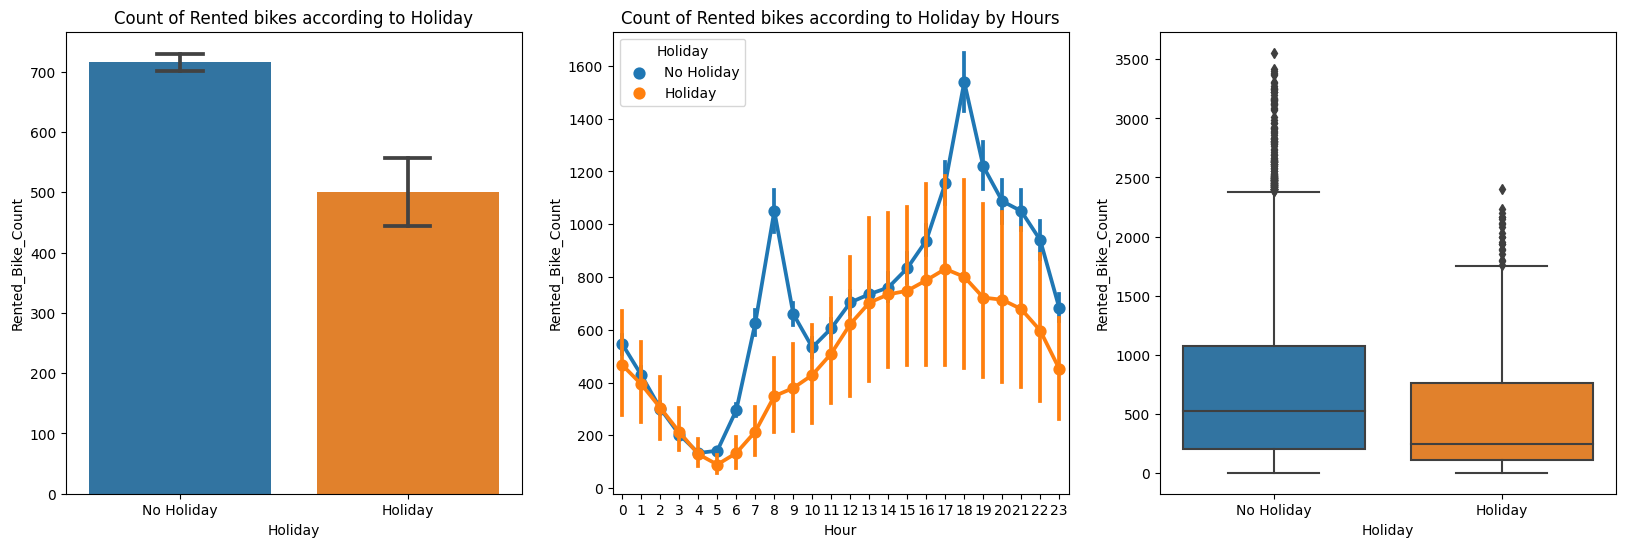

In [23]:
#Visualization by Holiday category
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Count of Rented bikes according to Holiday')
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',capsize=.2);

plt.subplot(1,3,2)
plt.title('Count of Rented bikes according to Holiday by Hours')
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday');

plt.subplot(1,3,3)
sns.boxplot(data=bike_df,x='Holiday',y='Rented_Bike_Count');

* ***In the above bar plot and point plot which shows the use of rented bike is highest when there is no holiday***
* ***plot shows that in holiday people uses the rented bike from 2pm-8pm***

####**Analysis of Numerical data by visualization**
* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

In [24]:
#making list of continuous variables
numerical_columns = bike_df.select_dtypes(['int64','float64']).columns
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

###**Numerical vs rented_bike_count**

In [25]:
#printing plot to analyse relationship between rented bike count and other numerical features
numerical_col= bike_df.select_dtypes(['int64','float64']).columns.drop(['Rented_Bike_Count'])
numerical_features1 = pd.Index(numerical_col)
numerical_features1

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

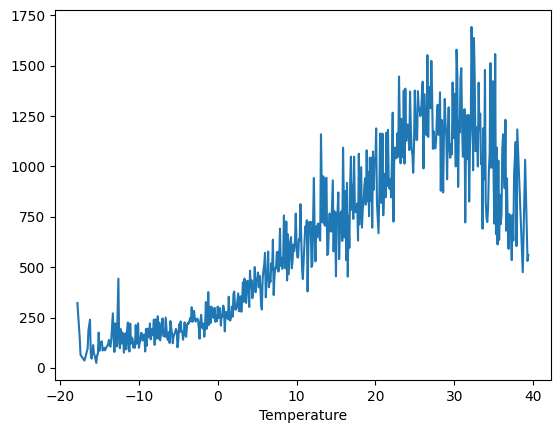

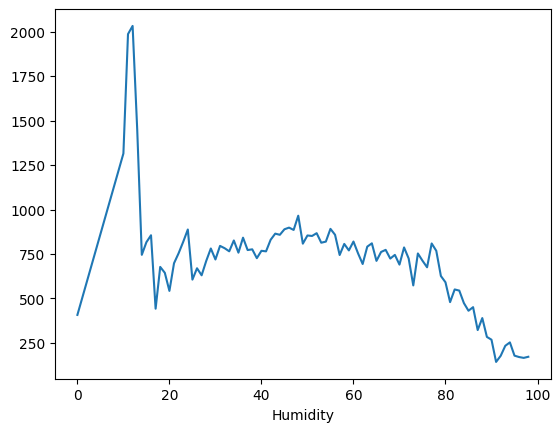

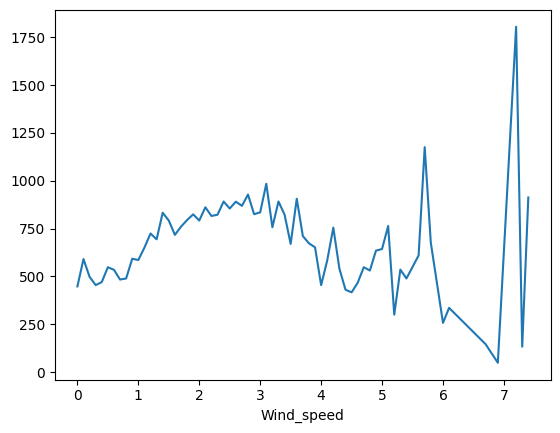

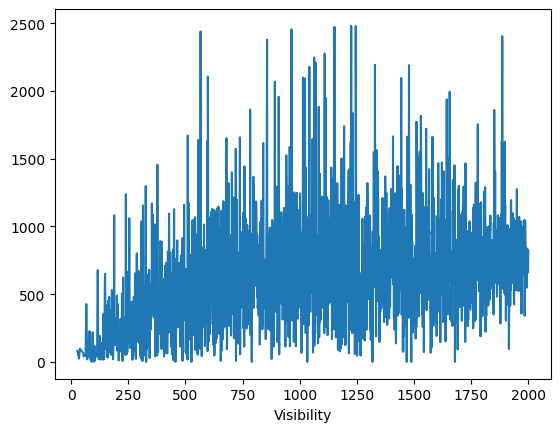

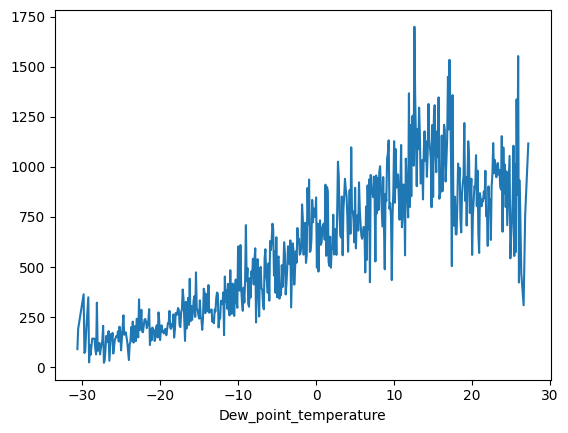

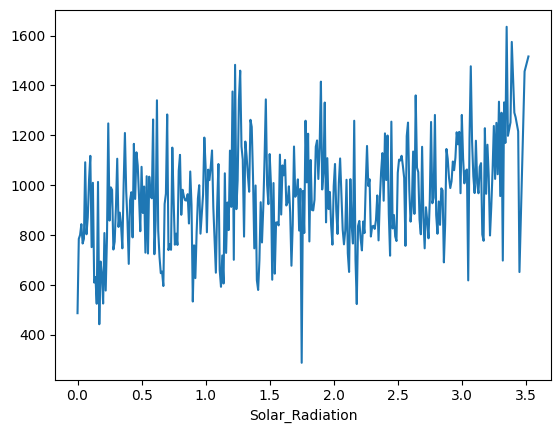

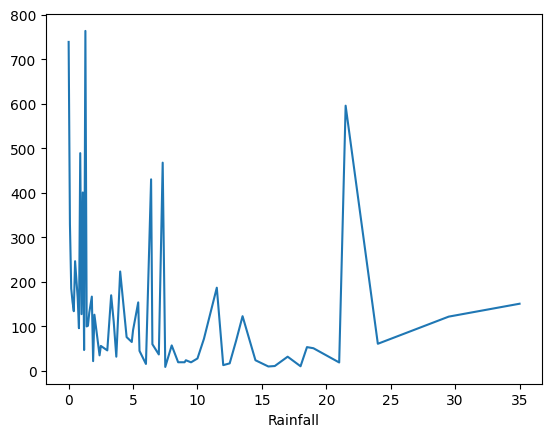

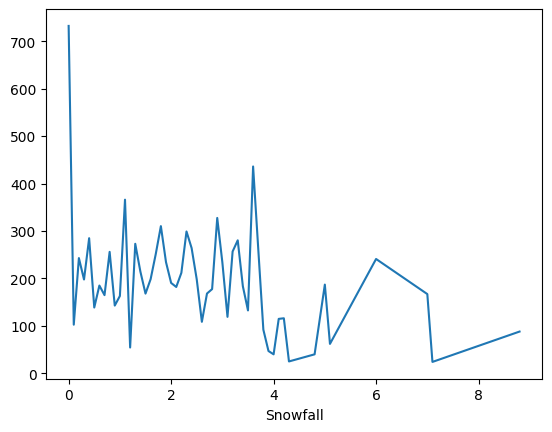

In [26]:
# making function to print all numerical features
for col in numerical_features1:
  bike_df.groupby(col).mean()['Rented_Bike_Count'].plot();
  plt.show();

* From the above plot we see that people like to ride bikes when it is pretty hot around 25°C average.
* We can see from the above plot that the **demand of rented bike is uniformly distributed** **despite of wind speed** but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means **peoples love to ride bikes when its little windy**.
* from the above plot we see that, the **amount of rented bikes is huge, when there is solar radiation**. when there is increase in solar radiation, there is increase in rented bike.
* we can see from above plot, **when there is no rain, rented bike count is huge**, but when there is rain, we can see increase in bike rented only at certain points, maybe it is when people are going to home from office on weekdays. but otherwise,there is no huge spike in the rented bike.
* We can see from the plot that, on the y-axis, **the amount of rented bike is very low When we have more than 4 cm of snow**, the bike rents is much lower

###**Regression plot**
**The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

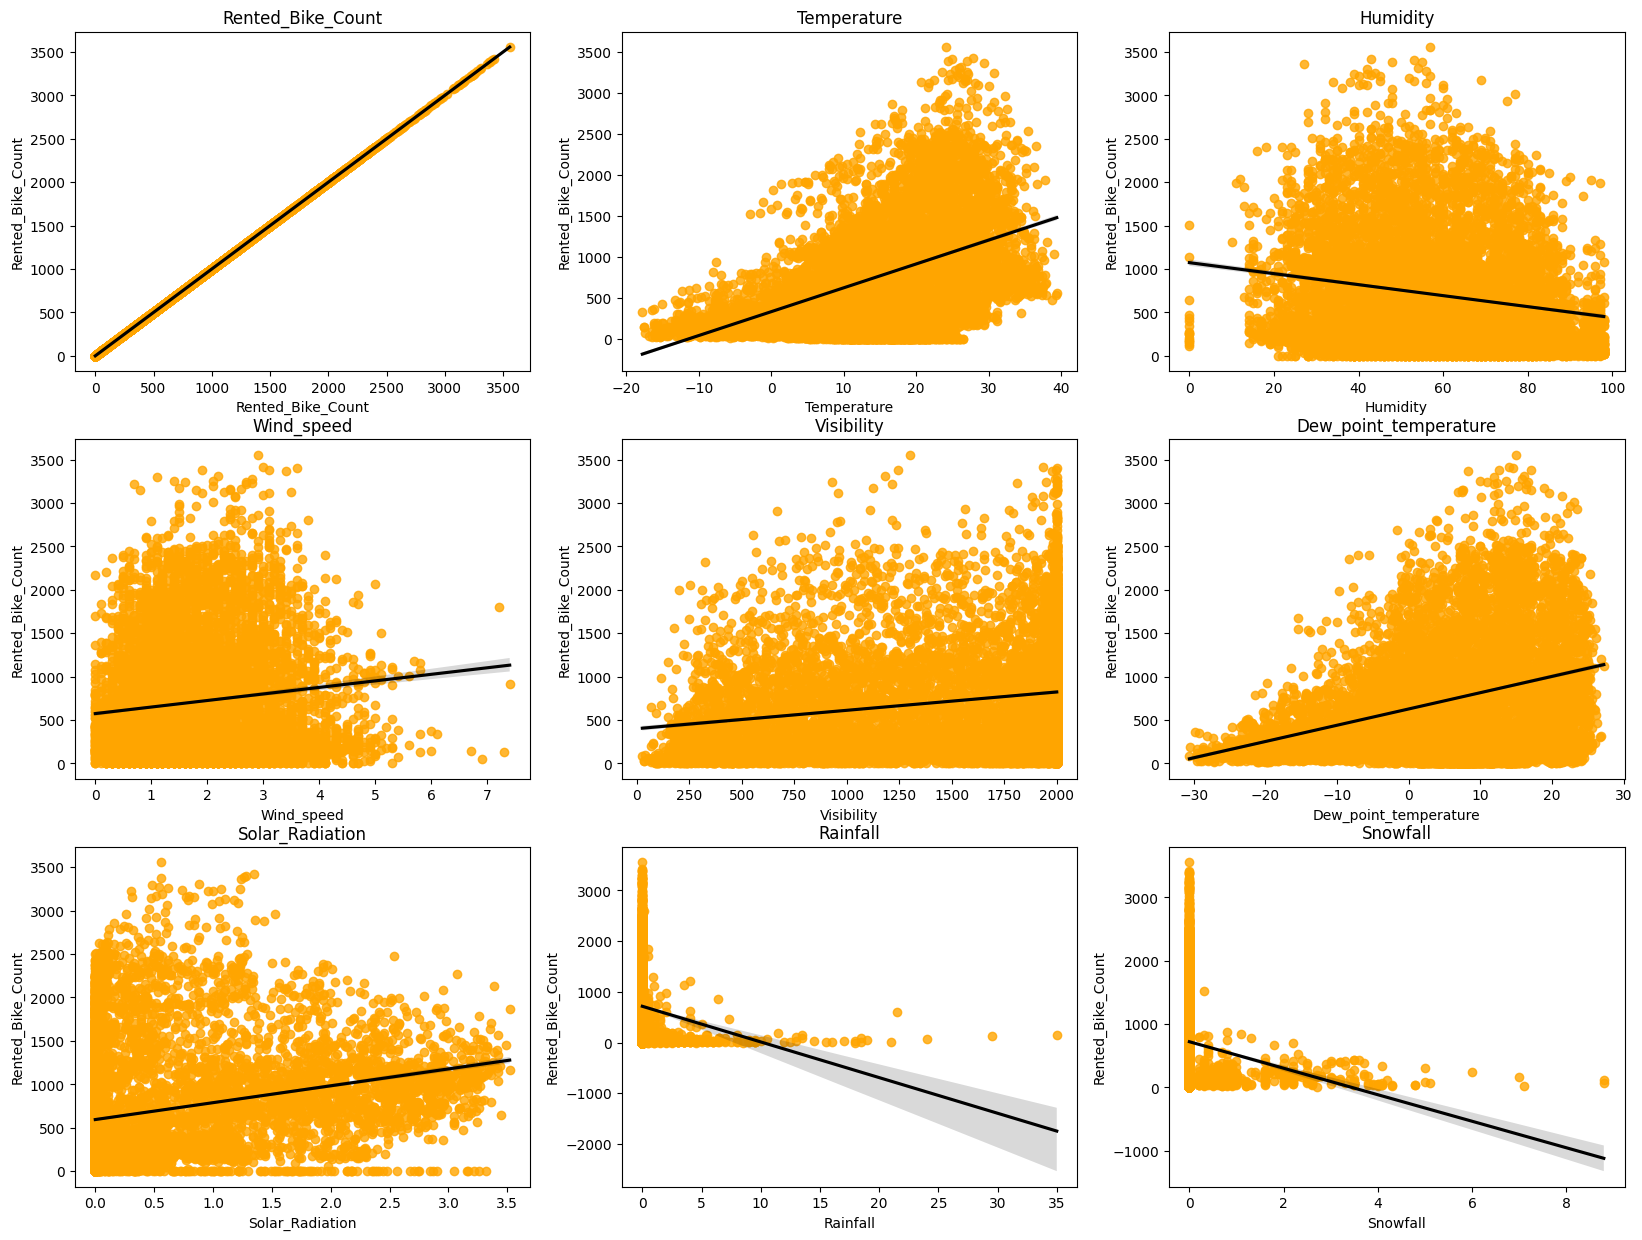

In [27]:
#printing the regression plot for all the numerical features

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title('Rented_Bike_Count')
sns.regplot(x=bike_df['Rented_Bike_Count'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,2)
plt.title('Temperature')
sns.regplot(x=bike_df['Temperature'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,3)
plt.title('Humidity')
sns.regplot(x=bike_df['Humidity'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,4)
plt.title('Wind_speed')
sns.regplot(x=bike_df['Wind_speed'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,5)
plt.title('Visibility')
sns.regplot(x=bike_df['Visibility'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,6)
plt.title('Dew_point_temperature')
sns.regplot(x=bike_df['Dew_point_temperature'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,7)
plt.title('Solar_Radiation')
sns.regplot(x=bike_df['Solar_Radiation'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,8)
plt.title('Rainfall')
sns.regplot(x=bike_df['Rainfall'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

plt.subplot(3,3,9)
plt.title('Snowfall')
sns.regplot(x=bike_df['Snowfall'],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"});

* From the above regression plot of all numerical features we see that the columns  **Temperature, Wind_speed, Solar_Radiation Snowfall are positively relation to the target variable**.which means the rented bike count increases with increase of these features.
* **Rainfall, Snowfall, Humidity these features are negatively related with the target variable** which means the rented bike count decreases when these features increase.

##**Checking skewness and outliers of the continuous Variable**

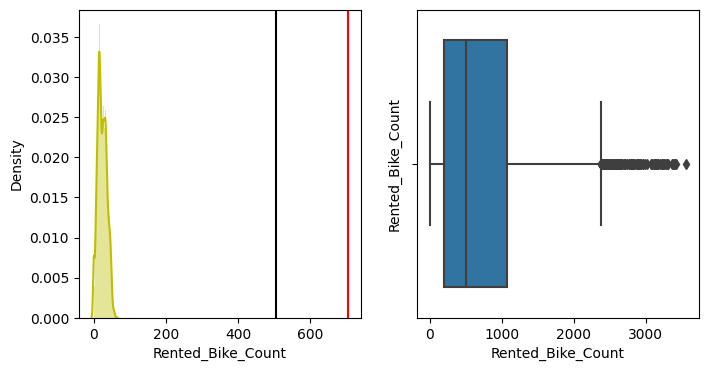

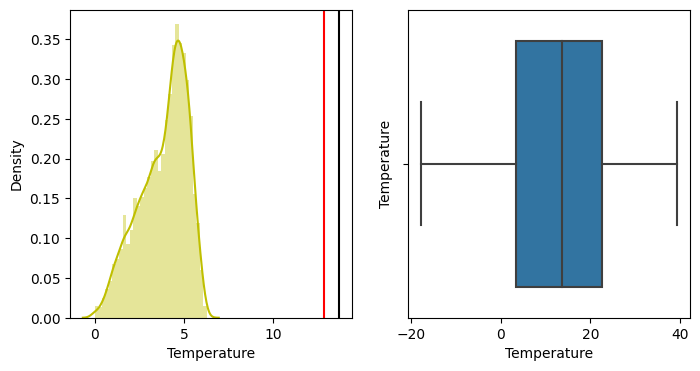

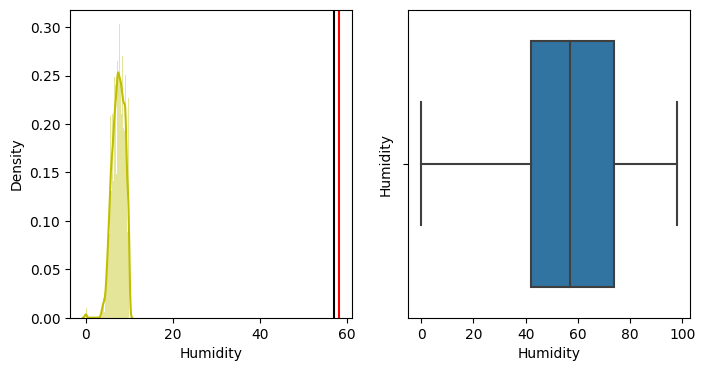

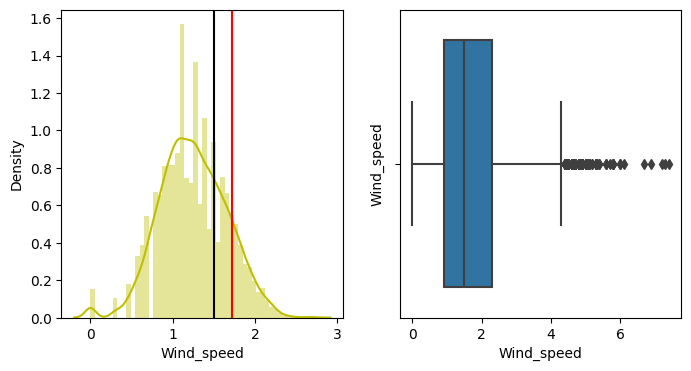

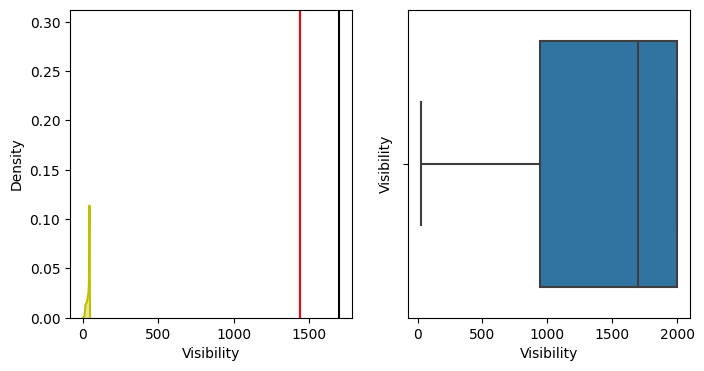

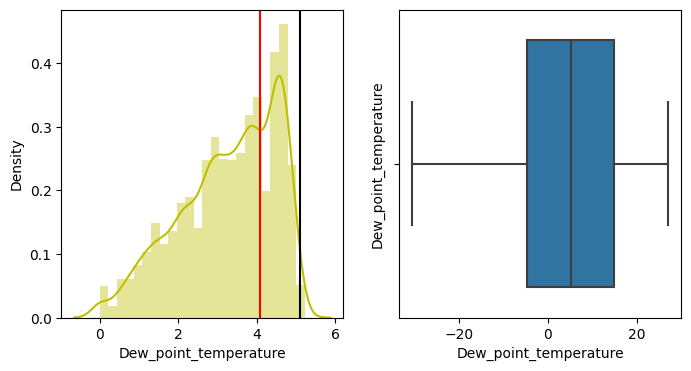

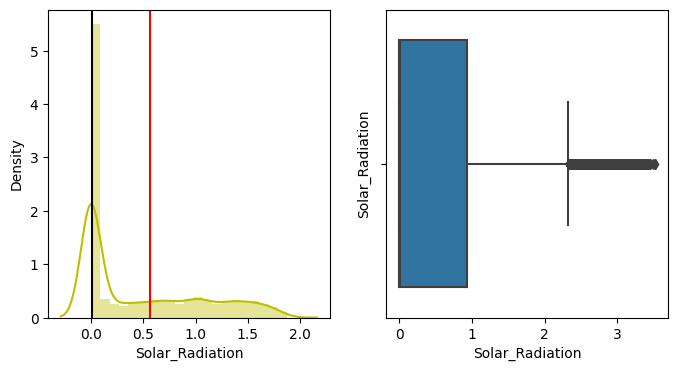

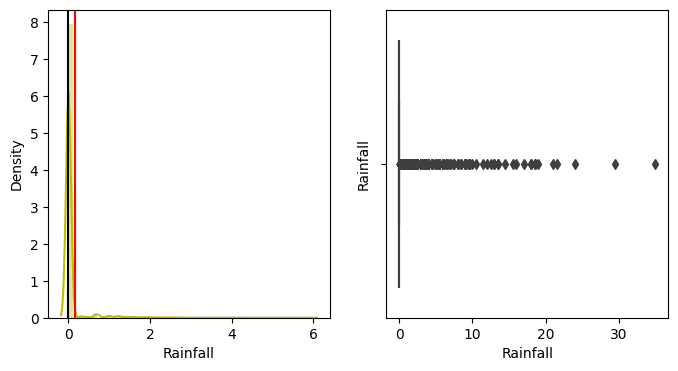

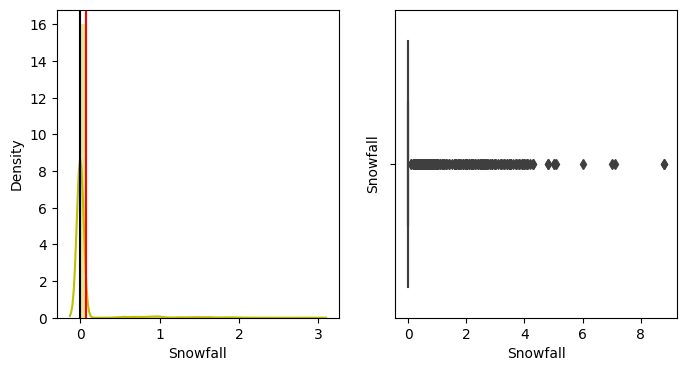

In [28]:
#applying square root to rented bike count
for col in numerical_features:    
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.xlabel(col)
    plt.ylabel('Density')
    ax=sns.distplot(np.sqrt(bike_df[col]),hist=True ,color="y")
    ax.axvline((bike_df[col]).mean(),color='red')
    ax.axvline((bike_df[col]).median(),color='black')

    plt.subplot(1,2,2)
    plt.ylabel(col)
    sns.boxplot(x=(bike_df[col]))
    plt.show();

* The above graph shows that Rented_Bike_Count,Visibility,Solar_Radiation,Rainfall,Snowfall has **highly skewed**. Since the assumption of linear regression is that 'the **distribution of dependent and independent variable has to be normal**', so we should perform some operation to make it normal.
* From boxplot, we have detected outliers in Rented Bike Count, Snowfall,Rainfall, Solar radiation, Wind speed column.

### **Methods to treat outliers:**
* **Trimming/Remove the outliers:** In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.
* **Quantile based flooring and capping:** In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
* **Mean/Median imputation:** As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

###**Method to treat Skewness:** 
* **1.log transformation:** transform skewed distribution to a normal distribution.
* **2.Remove outliers**
* **3.Normalize (min-max)**
* **4.Cube root:** when values are too large. Can be applied on negative values.
* **5.Square root:** applied only to positive values.
* **6.Reciprocal**
* **7.Square: apply on left skew**
* **Skewness in target variable:** Use undersampling, oversampling or SMOTE

In [29]:
#Handling Skewness in the data
bike_df['Rented_Bike_Count']=np.sqrt(bike_df['Rented_Bike_Count'])
bike_df['Snowfall']=np.cbrt(bike_df['Snowfall'])
bike_df['Rainfall']=np.cbrt(bike_df['Rainfall'])
bike_df['Solar_Radiation']=np.cbrt(bike_df['Solar_Radiation'])
bike_df['Humidity']=np.sqrt(bike_df['Humidity'])

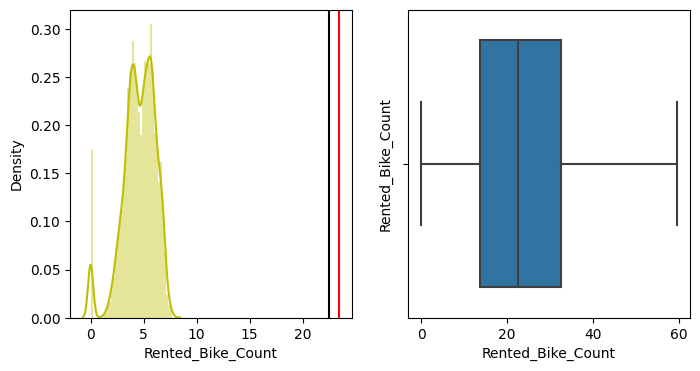

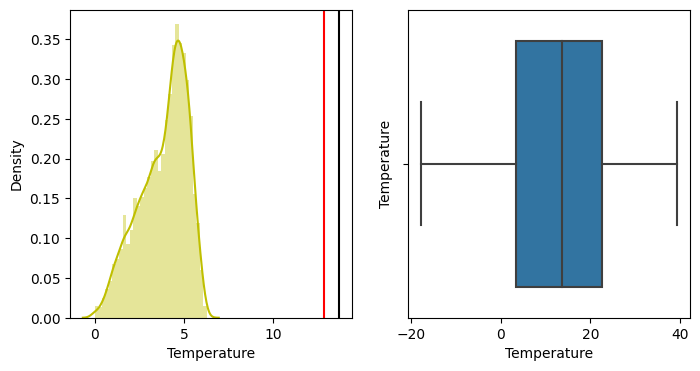

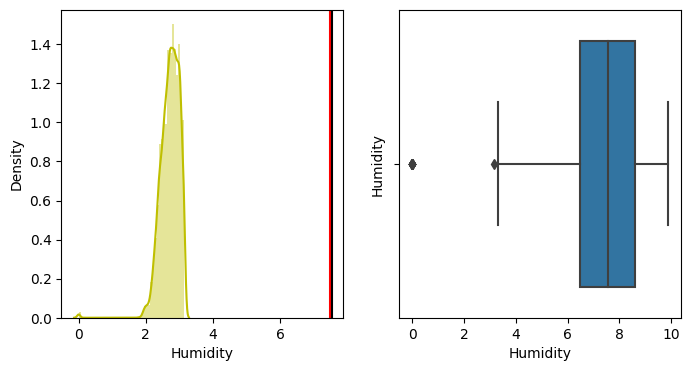

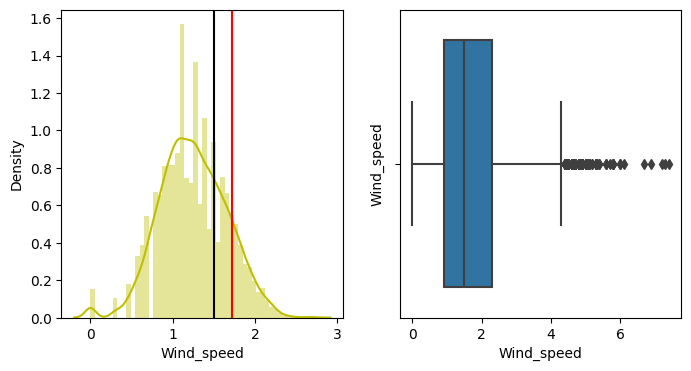

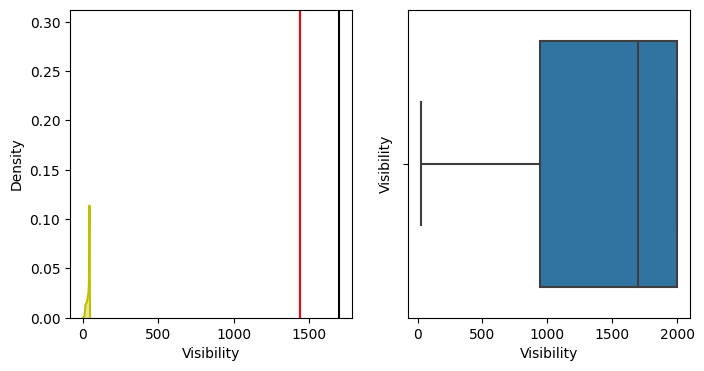

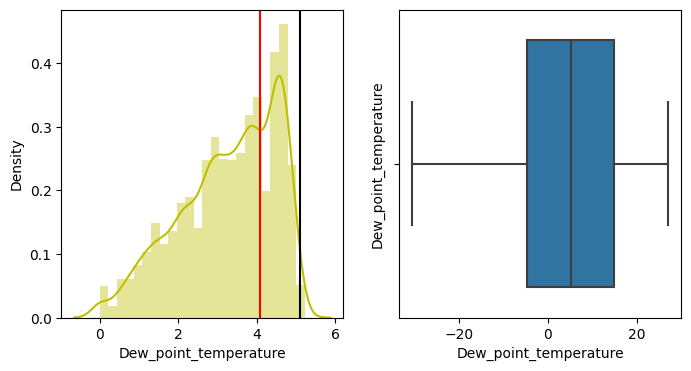

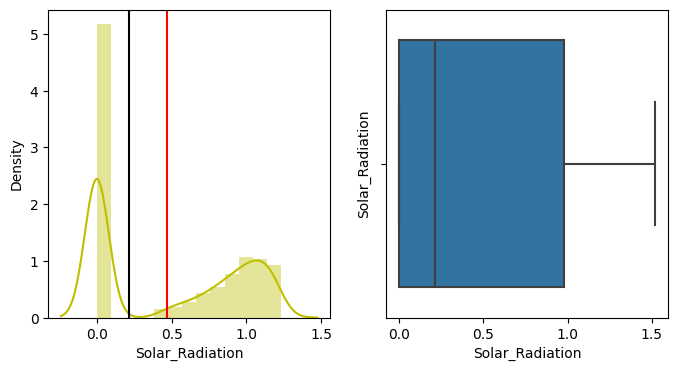

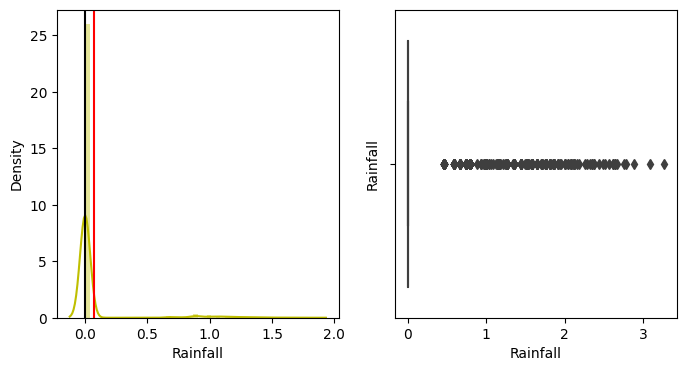

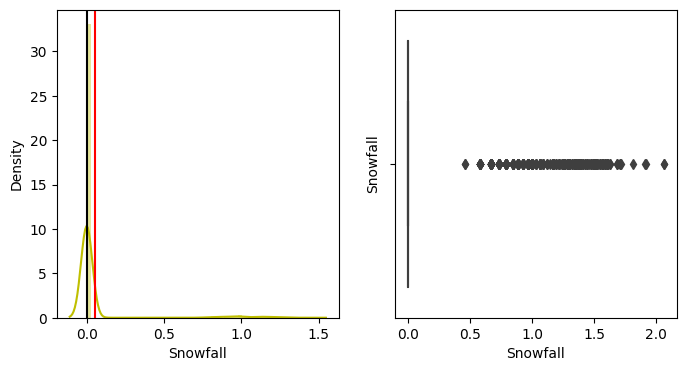

In [30]:
#applying square root to rented bike count
for col in numerical_features:    
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.xlabel(col)
    plt.ylabel('Density')
    ax=sns.distplot(np.sqrt(bike_df[col]),hist=True ,color="y")
    ax.axvline((bike_df[col]).mean(),color='red')
    ax.axvline((bike_df[col]).median(),color='black')

    plt.subplot(1,2,2)
    plt.ylabel(col)
    sns.boxplot(x=(bike_df[col]))
    plt.show();

* Since we have generic rule of applying Square root for the skewed variable in order to make it normal .**After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution**.
* After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

#**6. Feature selection**

###**Checking OLS model**
Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [31]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
x = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
y = bike_df['Rented_Bike_Count']


In [32]:
#add a constant column
x = sm.add_constant(x)   # here we are adding b0

#fit a OLS model 
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     823.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:36:50   Log-Likelihood:                -32062.
No. Observations:                8760   AIC:                         6.414e+04
Df Residuals:                    8751   BIC:                         6.421e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.7924      2.677      4.404      0.000       6.544      17.041
Temperature               0.9578      0.070     13.706      0.000       0.821       1.095
Humidity                 -0.0563      0.279     -0.201      0.840      -0.604       0.492
Wind_speed                0.5257      0.107      4.893      0.000       0.315       0.736
Visibility                0.0005      0.000      2.299      0.022    6.82e-05       0.001
Dew_point_temperature    -0.3922      0.073     -5.339      0.000      -0.536      -0.248
Solar_Radiation           0.9368      0.262      3.580      0.000       0.424       1.450
Rainfall                 -9.7581      0.364    -26.798      0.000     -10.472      -9.044
Snowfall                 -0.2878      0.445     -0.647      0.518      -1.160       0.584
==============================================================================
Omnibus:                      292.514   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.671
Skew:                          -0.265   Prob(JB):                    6.49e-118
Kurtosis:                       4.095   Cond. No.                     4.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error
* The Pr(>|t|) column represents the p-value associated with the value in the t value column. If the **p-value is less than a certain significance level (e.g. α = . 05) then the predictor variable is said to have a statistically significant relationship with the response variable in the model**.

* R sqauare and Adj Square are near to each other. **40% of variance in the Rented Bike count** is  explained by the model.
*  For F statistic , P value is less than 0.05 for 5% levelof significance.
*  P value of **dew point temp and visibility** are very high and they are **not significant**.

*  Omnibus tests the skewness and kurtosis of the residuals. Here **the value of Omnibus is high**. it shows we **have skewness** in our data.
*  The **condition number is large**, 3.11e+04. This might indicate that there are **strong multicollinearity** or other numerical problems.  
*  **Durbin-Watson tests** for autocorrelation of the residuals. Here value is less than 0.5. We can say that **there exists a positive auto correlation among the variables**.

###**Correlation Map**

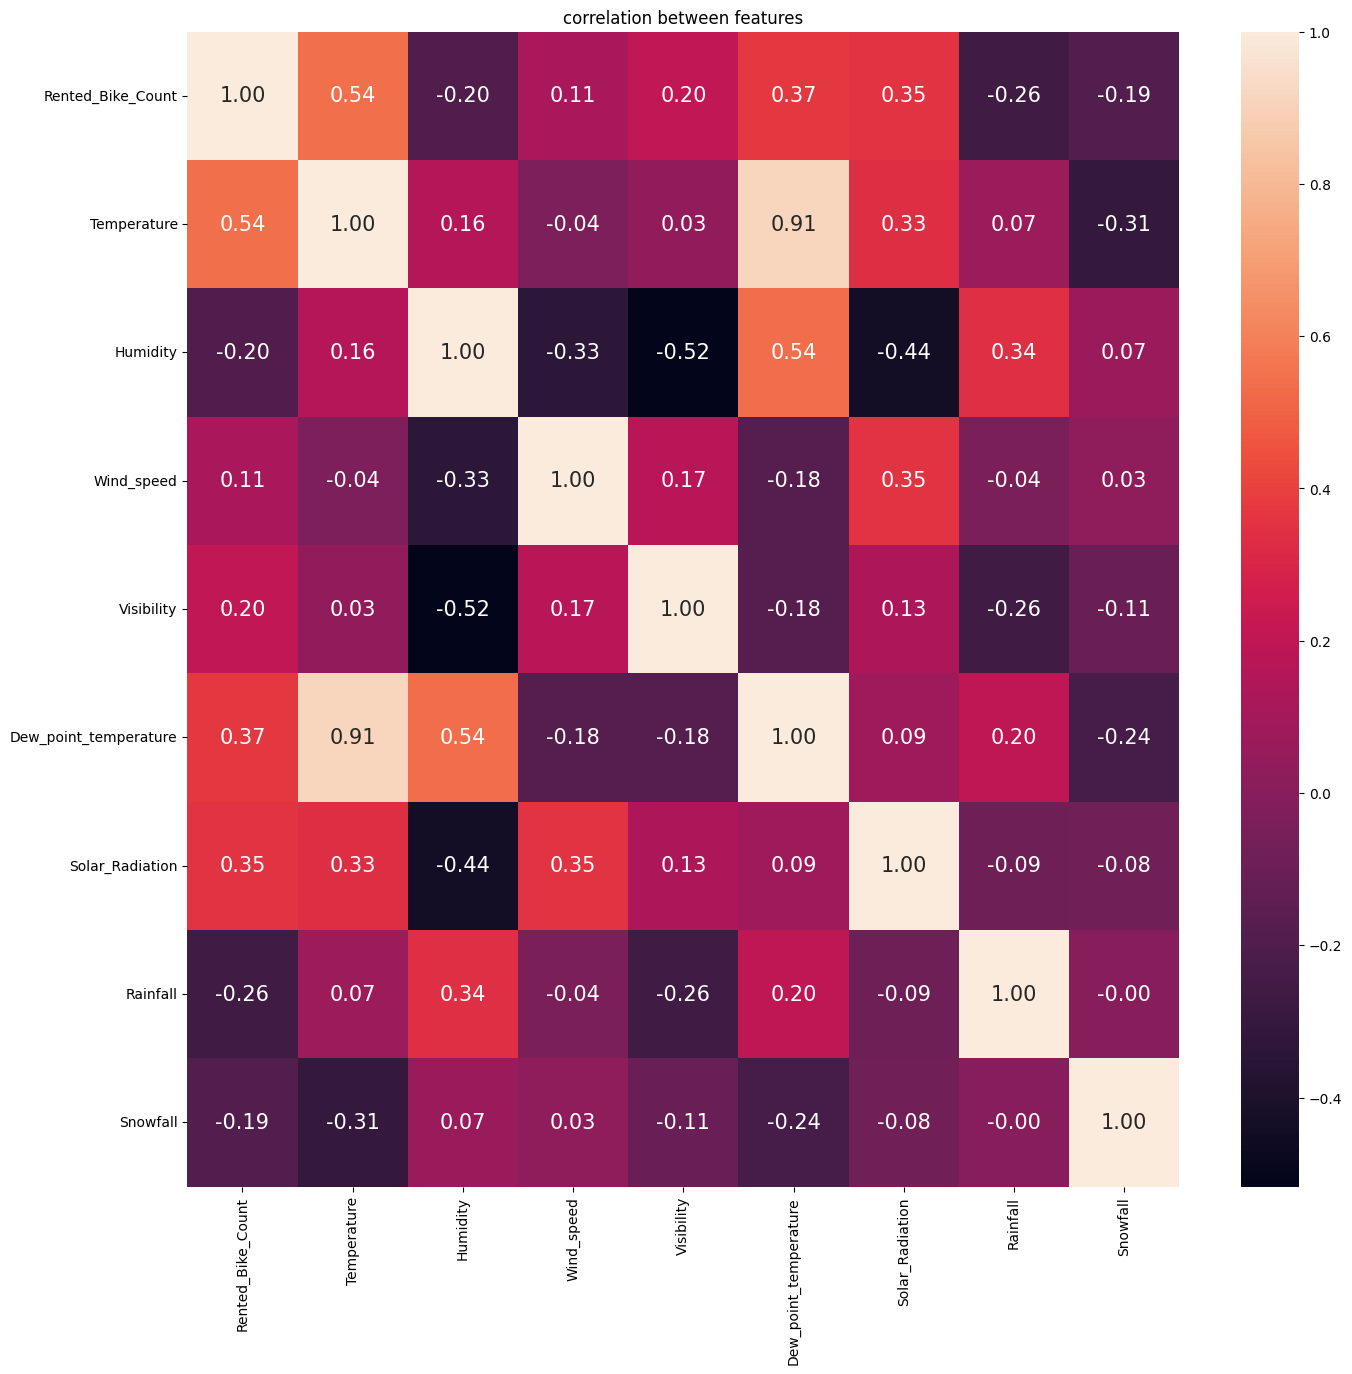

In [33]:
# correlation map
plt.figure(figsize=(16,15))
corr = bike_df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={'size':15})
plt.title('correlation between features');

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the bike rent are :***

* the temperature
* the dew point temperature
* the solar radiation
* Hour

***And most negatively correlated variables are:***
* Humidity
* Rainfall
* weekdays or weekends


from above correlation map, we can see that, there is **high correlation between 'Dew Point Temperature' and Temperature**. here we are featuring the best suitable model,sp we have to drop either one of the feature i.e. either Temperature or Dew Point Temperature.
* for dropping the **we check the (P>|t|)** value from above table and we can see that the **'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column.**

##**Checking Multicollinearity using VIF**

In [34]:
#Defining Variance Inflaition Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [35]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables        VIF
0            Temperature  28.859573
1               Humidity   6.897383
2             Wind_speed   4.622408
3             Visibility   9.339321
4  Dew_point_temperature  14.472229
5        Solar_Radiation   3.375640
6               Rainfall   1.213867
7               Snowfall   1.194918

**1. Variance Inflation Factor(VIF)**

– If VIF=1; No multicollinearity

– If VIF=<5; Low multicollinearity or moderately correlated

– If VIF=>5; High multicollinearity or highly correlated

**2. Tolerance(Reciprocal of VIF)**

– If VIF is high then tolerance will be low i.e, high multicollinearity.

– If VIF is low the tolerance will be high i.e, low multicollinearity.

In [36]:
# dropping dew point temperature column which has high VIF
bike_df = bike_df.drop(['Dew_point_temperature'],axis=1)

In [37]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables       VIF
0      Temperature  3.068595
1         Humidity  6.787146
2       Wind_speed  4.341296
3       Visibility  5.470823
4  Solar_Radiation  2.549679
5         Rainfall  1.189850
6         Snowfall  1.192036

In [38]:
# dropping dew point temperature column which has high VIF
bike_df = bike_df.drop(['Visibility'],axis=1)

In [39]:
#Checking Variance Inflaition Factor
VIF_table = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count']]])
VIF_table

variables       VIF
0      Temperature  3.065270
1         Humidity  4.693275
2       Wind_speed  3.930912
3  Solar_Radiation  2.508052
4         Rainfall  1.105720
5         Snowfall  1.184937

Since VIF of all variables is <5, we can go with remaining variables.

In [40]:
#Getting columns
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [41]:
# description of numerical values
bike_df.describe().astype(float).T

count       mean        std   min        25%        50%  \
Rented_Bike_Count  8760.0  23.443395  12.450984   0.0  13.820275  22.461075   
Temperature        8760.0  12.882922  11.944825 -17.8   3.500000  13.700000   
Humidity           8760.0   7.499699   1.407480   0.0   6.480741   7.549834   
Wind_speed         8760.0   1.724909   1.036300   0.0   0.900000   1.500000   
Solar_Radiation    8760.0   0.471520   0.525432   0.0   0.000000   0.215443   
Rainfall           8760.0   0.068315   0.296791   0.0   0.000000   0.000000   
Snowfall           8760.0   0.053414   0.241317   0.0   0.000000   0.000000   

                         75%        max  
Rented_Bike_Count  32.638167  59.632206  
Temperature        22.500000  39.400000  
Humidity            8.602325   9.899495  
Wind_speed          2.300000   7.400000  
Solar_Radiation     0.976100   1.521181  
Rainfall            0.000000   3.271066  
Snowfall            0.000000   2.064560

In [42]:
# description of object values
bike_df.describe(include='O').T

count unique         top  freq
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning_Day  8760      2         Yes  8465

* here we can see that, **highest rented bike** is during **Spring season**.
* here we can see that, **highest rented bike** is when there is **no Holiday and Functioning Day**.

#**7. Data preprocessing**

##**Create Dummy Variables**
A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [43]:
categorical_features = bike_df.select_dtypes(['object','category']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###**one hot encoding**

In [44]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Solar_Radiation  \
0          15.937377         -5.2  6.082763         2.2              0.0   
1          14.282857         -5.5  6.164414         0.8              0.0   
2          13.152946         -6.0  6.244998         1.0              0.0   
3          10.344080         -6.2  6.324555         0.9              0.0   
4           8.831761         -6.0  6.000000         2.3              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  \
0       0.0       0.0       0       0       0  ...        0        0        0   
1       0.0       0.0       1       0       0  ...        0        0        0   
2       0.0       0.0       0       1       0  ...        0        0        0   
3       0.0       0.0       0       0       1  ...        0        0        0   
4       0.0       0.0       0       0       0  ...        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0        0         0         0         1                   0  
1        0        0        0         0         0         1                   0  
2        0        0        0         0         0         1                   0  
3        0        0        0         0         0         1                   0  
4        0        0        0         0         0         1                   0  

[5 rows x 47 columns]

In [45]:
#one hot encoding using simple method
bike_df = pd.concat([bike_df,pd.get_dummies(bike_df[['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend']],drop_first=True)],axis=1)
bike_df1 = bike_df.drop(['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend'], axis=1)

In [46]:
bike_df1.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Solar_Radiation  \
0          15.937377         -5.2  6.082763         2.2              0.0   
1          14.282857         -5.5  6.164414         0.8              0.0   
2          13.152946         -6.0  6.244998         1.0              0.0   
3          10.344080         -6.2  6.324555         0.9              0.0   
4           8.831761         -6.0  6.000000         2.3              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  \
0       0.0       0.0       0       0       0  ...        0        0        0   
1       0.0       0.0       1       0       0  ...        0        0        0   
2       0.0       0.0       0       1       0  ...        0        0        0   
3       0.0       0.0       0       0       1  ...        0        0        0   
4       0.0       0.0       0       0       0  ...        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0        0         0         0         1                   0  
1        0        0        0         0         0         1                   0  
2        0        0        0         0         0         1                   0  
3        0        0        0         0         0         1                   0  
4        0        0        0         0         0         1                   0  

[5 rows x 47 columns]

#**8. ML model implementation**

###**Train Test Split for regression**
Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [47]:
#Assign the value in X and Y
x = bike_df1.drop(['Rented_Bike_Count'],axis=1)
y = np.sqrt(bike_df1['Rented_Bike_Count'])

In [48]:
#Name of Features
x_columns = x.columns
x_columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [49]:
x.head()

Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  Snowfall  \
0         -5.2  6.082763         2.2              0.0       0.0       0.0   
1         -5.5  6.164414         0.8              0.0       0.0       0.0   
2         -6.0  6.244998         1.0              0.0       0.0       0.0   
3         -6.2  6.324555         0.9              0.0       0.0       0.0   
4         -6.0  6.000000         2.3              0.0       0.0       0.0   

   Hour_1  Hour_2  Hour_3  Hour_4  ...  month_4  month_5  month_6  month_7  \
0       0       0       0       0  ...        0        0        0        0   
1       1       0       0       0  ...        0        0        0        0   
2       0       1       0       0  ...        0        0        0        0   
3       0       0       1       0  ...        0        0        0        0   
4       0       0       0       1  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 46 columns]

In [50]:
y.head()

0    3.992165
1    3.779267
2    3.626699
3    3.216221
4    2.971828
Name: Rented_Bike_Count, dtype: float64

##**Standardising the features**

In [51]:
#Create test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(7008, 46)
(1752, 46)


In [52]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
#Transformed data
x_train = pd.DataFrame(x_train,columns=x_columns) 
x_test = pd.DataFrame(x_test,columns=x_columns) 
print(x_train.head())

   Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  Snowfall  \
0    -0.388746  0.270388   -1.081683         1.131130 -0.228017 -0.221908   
1     1.298504  0.039138    0.647847         0.893738 -0.228017 -0.221908   
2     1.423795  0.039138   -0.024748         0.921743  1.353094 -0.221908   
3     0.162534 -1.505036   -1.081683         1.571878 -0.228017 -0.221908   
4    -0.054637 -0.456057   -0.601258        -0.898300 -0.228017 -0.221908   

    Hour_1    Hour_2    Hour_3    Hour_4  ...   month_4   month_5   month_6  \
0 -0.21074 -0.216221 -0.205893 -0.205516  ... -0.300101 -0.301793 -0.299253   
1 -0.21074 -0.216221 -0.205893 -0.205516  ... -0.300101 -0.301793 -0.299253   
2 -0.21074 -0.216221 -0.205893 -0.205516  ... -0.300101 -0.301793 -0.299253   
3 -0.21074 -0.216221 -0.205893 -0.205516  ...  3.332211 -0.301793 -0.299253   
4 -0.21074 -0.216221 -0.205893 -0.205516  ... -0.300101 -0.301793 -0.299253   

    month_7   month_8   month_9  month_10  month_11  month_12 

In [54]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

###**Function for heteroscedasticity**

In [55]:
#Function for Heteroscedasticity 
def Heteroscedasticity(y_test,y_pred_test):  
  residuals = y_test - y_pred_test  
  ### Heteroscadacity
  plt.figure(figsize=(15,5))
  #plotting the residuals
  plt.subplot(1,2,1)
  plt.xlabel('residuals')
  sns.distplot(residuals);

  #plotting the scatterplot
  plt.subplot(1,2,2)
  plt.xlabel('scatterplot of residuals')
  plt.scatter(y_pred_test,residuals);

  plt.show();

##**Linear Regression**

In [56]:
#import the packages
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train,y_train)

LinearRegression()

In [57]:
#check the coefficeint
Linear_Regression.coef_

array([ 4.74136965e-01, -1.53780589e-01, -1.38114494e-02,  2.70118077e-01,
       -4.03870114e-01, -3.08614090e-02, -5.22314925e-02, -1.23003331e-01,
       -1.68137810e-01, -2.43669472e-01, -2.35212063e-01, -1.16572393e-01,
       -7.88561113e-03,  7.76792817e-02, -3.64511742e-02, -1.36322473e-01,
       -1.37321814e-01, -1.11063669e-01, -1.15208652e-01, -1.16184663e-01,
       -9.28808501e-02, -5.61201089e-02,  1.85188581e-02,  1.47067671e-01,
        1.07538633e-01,  9.87718343e-02,  1.21409228e-01,  8.99733493e-02,
        2.32787430e-02,  7.42275072e+11, -3.59297924e+12, -1.65430468e+12,
        8.48117991e-02,  9.22195150e-01, -2.13773699e-02, -1.54675744e+12,
       -1.52888742e+12, -1.53607142e+12,  1.22055318e+12,  1.23395212e+12,
        1.23774206e+12, -1.05665903e+12, -1.07148316e+12, -1.06821456e+12,
        6.92022544e-02, -7.44116743e-02])

In [58]:
#get the predicted value of dependent variable
y_pred_train=Linear_Regression.predict(x_train)
y_pred_test=Linear_Regression.predict(x_test)

In [59]:
#Training dataset of linear regression
#calculate MSE
print('Metric value of training dataset')
MSE_lr = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_lr)
#calculate RMSE 
RMSE_lr = np.sqrt(MSE_lr)   
print("RMSE :",RMSE_lr)
#calculate MAE 
MAE_lr = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_lr)
#calculate r2 and adjusted r2
r2_lr = r2_score(y_train, y_pred_train)         
print("R2 :",r2_lr)
Adjusted_r2_lr = 1-(((1-r2_lr)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_lr)

Metric value of training dataset
MSE : 0.3093118248116545
RMSE : 0.5561580933616398
MAE : 0.40954141168362057
R2 : 0.8612396433184983
Adjusted R2 : 0.8574959621411675


In [60]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression of train dataset',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr),3)
       }
training_df=pd.DataFrame(dict1,index=[1])
training_df

Model   MAE    MSE   RMSE  R2_score  \
1  Linear regression of train dataset  0.41  0.309  0.556     0.861   

   Adjusted R2  
1        0.857

In [61]:
#Testing dataset
#calculate MSE 
print('Metric value of testing dataset')
MSE_lr = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_lr)
#calculate RMSE 
RMSE_lr = np.sqrt(MSE_lr)   
print("RMSE :",RMSE_lr)
#calculate MAE 
MAE_lr = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_lr)
#calculate r2 and adjusted r2
r2_lr = r2_score(y_test, y_pred_test)         
print("R2 :",r2_lr)
Adjusted_r2_lr = 1-(((1-r2_lr)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_lr)

Metric value of testing dataset
MSE : 0.31332174132216234
RMSE : 0.5597514996158227
MAE : 0.4126794324150582
R2 : 0.8675147120740503
Adjusted R2 : 0.8639403289393912


In [62]:

# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression of test dataset',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr),3)
       }
testing_df=pd.DataFrame(dict2,index=[1])
testing_df

Model    MAE    MSE  RMSE  R2_score  \
1  Linear regression of test dataset  0.413  0.313  0.56     0.868   

   Adjusted R2  
1        0.864

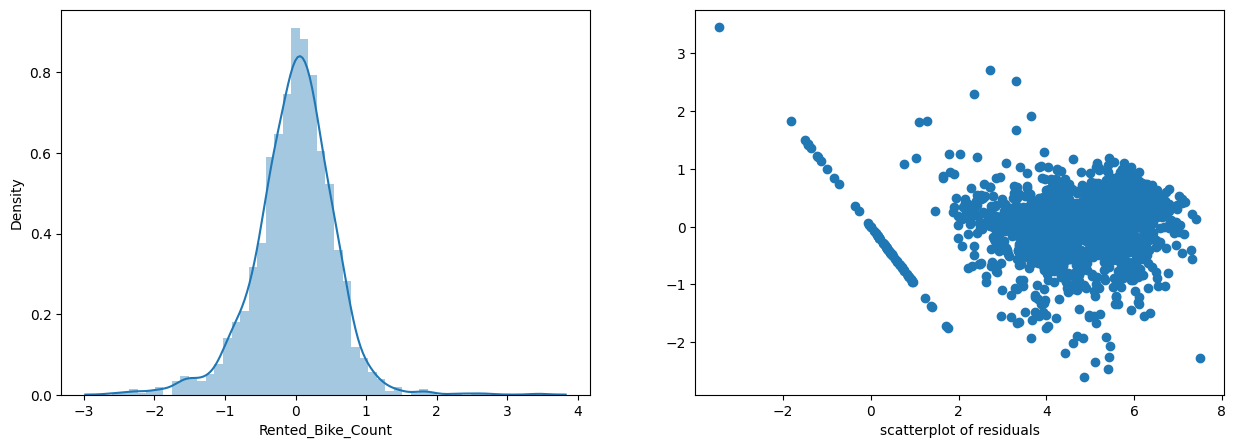

In [63]:
Heteroscedasticity(y_test,y_pred_test)

* **Simple Linear Regression Model** 
* **R2 score of Train data : 0.861** 
* **adjusted R2 score of Train data : 0.857**
* **R2 score of Test data : 0.868** 
* **adjusted R2 score of Test data : 0.864**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.


##**Ridge Regression**

In [64]:
#import the packages
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(x_train,y_train)

Ridge(alpha=0.1)

In [65]:
#get the y_pred_train and y_pred_test value
y_pred_train=ridge_regression.predict(x_train)
y_pred_test=ridge_regression.predict(x_test)

In [66]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_r = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_r)
#calculate RMSE 
RMSE_r = np.sqrt(MSE_r)   
print("RMSE :",RMSE_r)
#calculate MAE 
MAE_r = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_r)
#calculate r2 and adjusted r2
r2_r = r2_score(y_train, y_pred_train)         
print("R2 :",r2_r)
Adjusted_r2_r = 1-(((1-r2_r)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_r)
#creating table of metric values
dict1={'Model':'Ridge Regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_r2_r),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_r = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_r)
#calculate RMSE 
RMSE_r = np.sqrt(MSE_r)   
print("RMSE :",RMSE_r)
#calculate MAE 
MAE_r = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_r)
#calculate r2 and adjusted r2
r2_r = r2_score(y_test, y_pred_test)         
print("R2 :",r2_r)
Adjusted_r2_r = 1-(((1-r2_r)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_r)
#creating table of metric values
dict2={'Model':'Ridge Regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_r2_r),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.30929952659278087
RMSE : 0.5561470368461752
MAE : 0.40968327153886
R2 : 0.8612451604216304
Adjusted R2 : 0.8575016280928298
Metric value of testing dataset
MSE : 0.31306803406875344
RMSE : 0.5595248288224156
MAE : 0.4124940644541919
R2 : 0.8676219899104842
Adjusted R2 : 0.8640505010752246


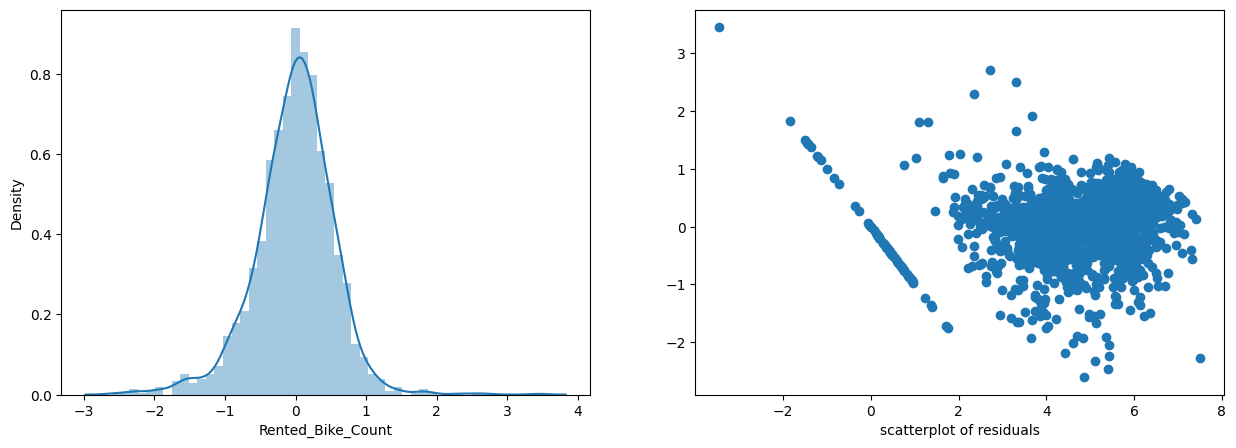

In [67]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **Ridge Regression Model** 
* **R2 score of Train data : 0.861** 
* **adjusted R2 score of Train data : 0.857**
* **R2 score of Test data : 0.867** 
* **adjusted R2 score of Test data : 0.864**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.

##**Decision Tree with gridsearchcv**

In [68]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)

In [70]:
#get the y_pred_train and y_pred_test value
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [71]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_dt = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_dt)
#calculate RMSE 
RMSE_dt = np.sqrt(MSE_dt)   
print("RMSE :",RMSE_dt)
#calculate MAE 
MAE_dt = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_dt)
#calculate r2 and adjusted r2
r2_dt = r2_score(y_train, y_pred_train)         
print("R2 :",r2_dt)
Adjusted_r2_dt = 1-(((1-r2_dt)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_dt)
#creating table of metric values
dict1={'Model':'Decision Tree Regression',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_dt = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_dt)
#calculate RMSE 
RMSE_dt = np.sqrt(MSE_dt)   
print("RMSE :",RMSE_dt)
#calculate MAE 
MAE_dt = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_dt)
#calculate r2 and adjusted r2
r2_dt = r2_score(y_test, y_pred_test)         
print("R2 :",r2_dt)
Adjusted_r2_dt = 1-(((1-r2_dt)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_dt)
#creating table of metric values
dict2={'Model':'Decision Tree Regression',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.050976662180024085
RMSE : 0.22578011909825915
MAE : 0.1362674989104028
R2 : 0.9771313630481481
Adjusted R2 : 0.9765143792946084
Metric value of testing dataset
MSE : 0.2551017951375009
RMSE : 0.5050760290664178
MAE : 0.31182187663694144
R2 : 0.8921324941046219
Adjusted R2 : 0.8892222857344241


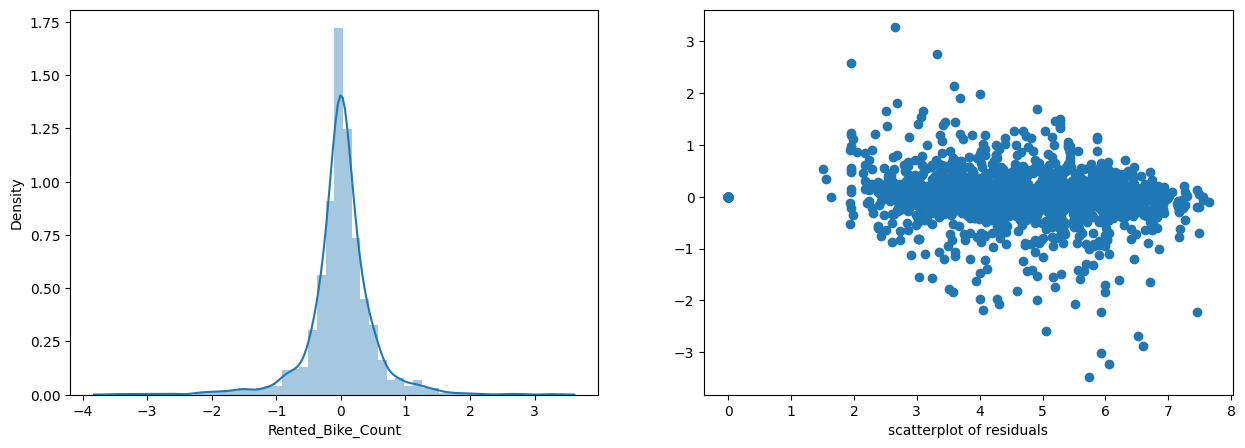

In [72]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **Decision Tree Regression with GridSearchCV Model** 
* **R2 score of Train data : 0.98** 
* **adjusted R2 score of Train data : 0.98**
* **R2 score of Test data : 0.89** 
* **adjusted R2 score of Test data : 0.89**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.

##**Random Forest**

In [73]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
#get the y predicted value for train and test dataset
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

In [75]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_rf = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_rf)
#calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)   
print("RMSE :",RMSE_rf)
#calculate MAE 
MAE_rf = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_rf)
#calculate r2 and adjusted r2
r2_rf = r2_score(y_train, y_pred_train)         
print("R2 :",r2_rf)
Adjusted_r2_rf = 1-(((1-r2_rf)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_rf)
#creating table of metric values
dict1={'Model':'Random Forest',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_rf = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_rf)
#calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)   
print("RMSE :",RMSE_rf)
#calculate MAE 
MAE_rf = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_rf)
#calculate r2 and adjusted r2
r2_rf = r2_score(y_test, y_pred_test)         
print("R2 :",r2_rf)
Adjusted_r2_rf = 1-(((1-r2_rf)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_rf)
#creating table of metric values
dict2={'Model':'Random Forest',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.01799748447591262
RMSE : 0.1341547035176651
MAE : 0.0834428497758804
R2 : 0.9919261497139074
Adjusted R2 : 0.9917083214950451
Metric value of testing dataset
MSE : 0.15321000989603084
RMSE : 0.39142050265159956
MAE : 0.23441441503898092
R2 : 0.9352165215584498
Adjusted R2 : 0.9334686975066543


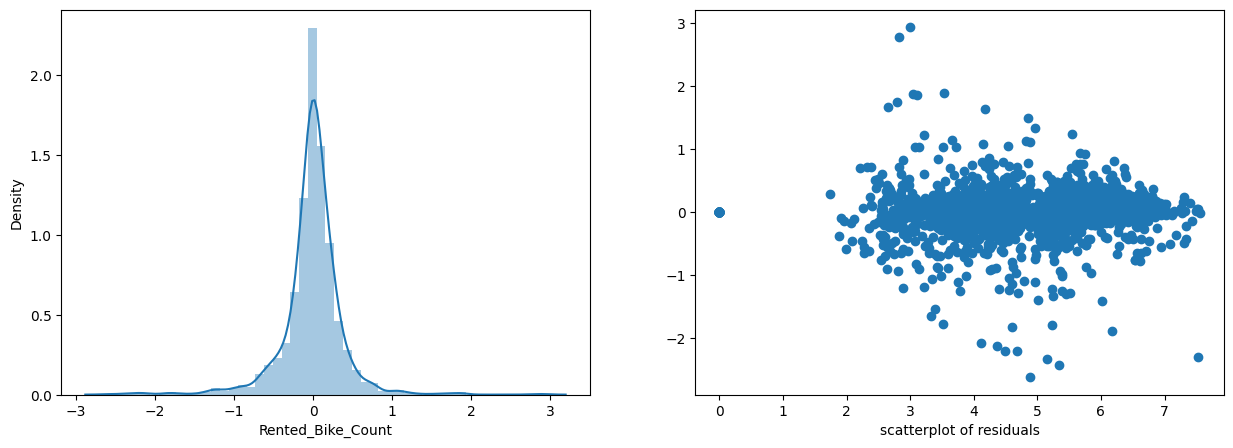

In [76]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **Random Forest Model** 
* **R2 score of Train data : 0.99** 
* **adjusted R2 score of Train data : 0.99**
* **R2 score of Test data : 0.934** 
* **adjusted R2 score of Test data : 0.933**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.

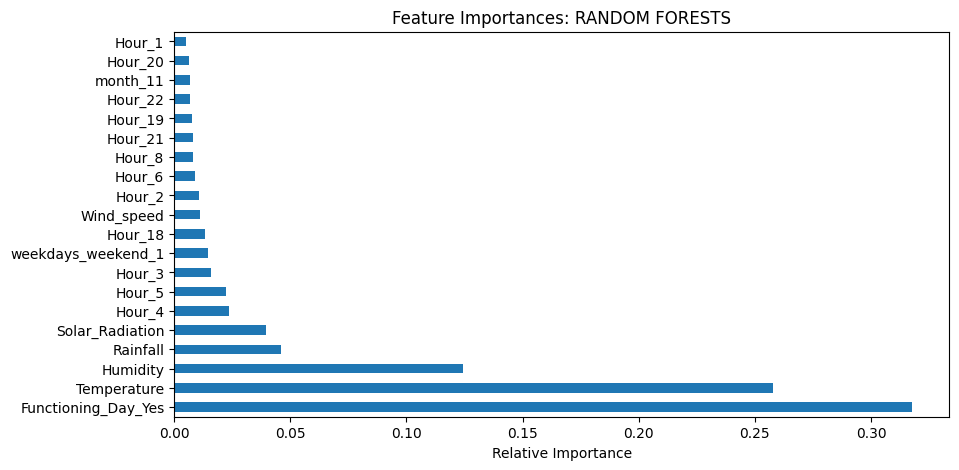

In [77]:
# Feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day, Temperature, and Humidity** has much **higher relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **Random Forest model.**

##**Gradient Boosting**

In [78]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [79]:
#get the y predicted value for train and test dataset
y_pred_train=gradient_boosting_regressor.predict(x_train)
y_pred_test=gradient_boosting_regressor.predict(x_test)

In [80]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_gb = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_gb)
#calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)   
print("RMSE :",RMSE_gb)
#calculate MAE 
MAE_gb = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_gb)
#calculate r2 and adjusted r2
r2_gb = r2_score(y_train, y_pred_train)         
print("R2 :",r2_gb)
Adjusted_r2_gb = 1-(((1-r2_gb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gb)
#creating table of metric values
dict1={'Model':'Gradient Boosting Regressor',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_gb = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_gb)
#calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)   
print("RMSE :",RMSE_gb)
#calculate MAE 
MAE_gb = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_gb)
#calculate r2 and adjusted r2
r2_gb = r2_score(y_test, y_pred_test)         
print("R2 :",r2_gb)
Adjusted_r2_gb = 1-(((1-r2_gb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gb)
#creating table of metric values
dict2={'Model':'Gradient Boosting Regressor',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.20929156357600778
RMSE : 0.457483948981828
MAE : 0.3462500816021791
R2 : 0.9061097259055005
Adjusted R2 : 0.9035766158712795
Metric value of testing dataset
MSE : 0.2367810552546953
RMSE : 0.48660153642862175
MAE : 0.3642162483455871
R2 : 0.8998792546331045
Adjusted R2 : 0.8971780497727659


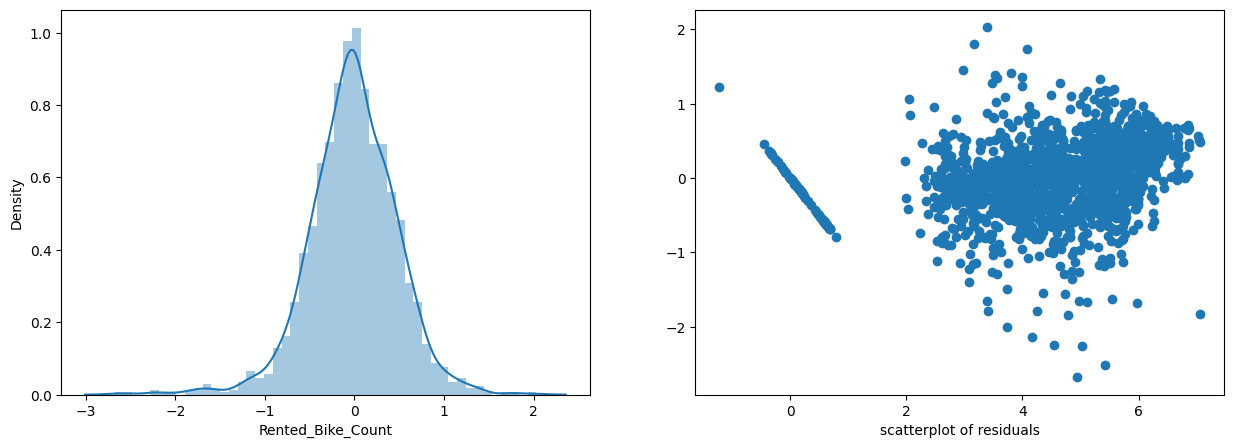

In [81]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **Gradient Boosting Model** 
* **R2 score of Train data : 0.91** 
* **adjusted R2 score of Train data : 0.90**
* **R2 score of Test data : 0.90** 
* **adjusted R2 score of Test data : 0.90**
* **Performance of data: Better**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.


##**Hyper parameter Tuning:**
* **GridSearchCV**


###**Gradient Boosting with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [82]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf}

In [83]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gradient_boosting_gridsearchcv = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5)
gradient_boosting_gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [50, 80, 100]})

In [84]:
gb_optimal_model = gradient_boosting_gridsearchcv.best_estimator_

In [85]:
#get the y predicted value for train and test dataset
y_pred_train = gb_optimal_model.predict(x_train)
y_pred_test = gb_optimal_model.predict(x_test)

In [86]:
gradient_boosting_gridsearchcv = gradient_boosting_gridsearchcv.best_estimator_
gradient_boosting_gridsearchcv

GradientBoostingRegressor(max_depth=10, min_samples_leaf=30)

In [87]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_gbgs = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_gbgs)
#calculate RMSE 
RMSE_gbgs = np.sqrt(MSE_gbgs)   
print("RMSE :",RMSE_gbgs)
#calculate MAE 
MAE_gbgs = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_gbgs)
#calculate r2 and adjusted r2
r2_gbgs = r2_score(y_train, y_pred_train)         
print("R2 :",r2_gbgs)
Adjusted_r2_gbgs = 1-(((1-r2_gbgs)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gbgs)
#creating table of metric values
dict1={'Model':'Gradient Boosting Regressor with GridSearchCV',
       'MAE':round((MAE_gbgs),3),
       'MSE':round((MSE_gbgs),3),
       'RMSE':round((RMSE_gbgs),3),
       'R2_score':round((r2_gbgs),3),
       'Adjusted R2':round((Adjusted_r2_gbgs),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_gbgs = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_gbgs)
#calculate RMSE 
RMSE_gbgs = np.sqrt(MSE_gbgs)   
print("RMSE :",RMSE_gbgs)
#calculate MAE 
MAE_gbgs = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_gbgs)
#calculate r2 and adjusted r2
r2_gbgs = r2_score(y_test, y_pred_test)         
print("R2 :",r2_gbgs)
Adjusted_r2_gbgs = 1-(((1-r2_gbgs)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_gbgs)
#creating table of metric values
dict2={'Model':'Gradient Boosting Regressor with GridSearchCV',
       'MAE':round((MAE_gbgs),3),
       'MSE':round((MSE_gbgs),3),
       'RMSE':round((RMSE_gbgs),3),
       'R2_score':round((r2_gbgs),3),
       'Adjusted R2':round((Adjusted_r2_gbgs),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.06769494442441971
RMSE : 0.2601825213660974
MAE : 0.1707059019825679
R2 : 0.9696313755880923
Adjusted R2 : 0.9688120461318179
Metric value of testing dataset
MSE : 0.13940470717276846
RMSE : 0.37336939774540767
MAE : 0.23875240097178643
R2 : 0.9410539699859936
Adjusted R2 : 0.9394636372114221


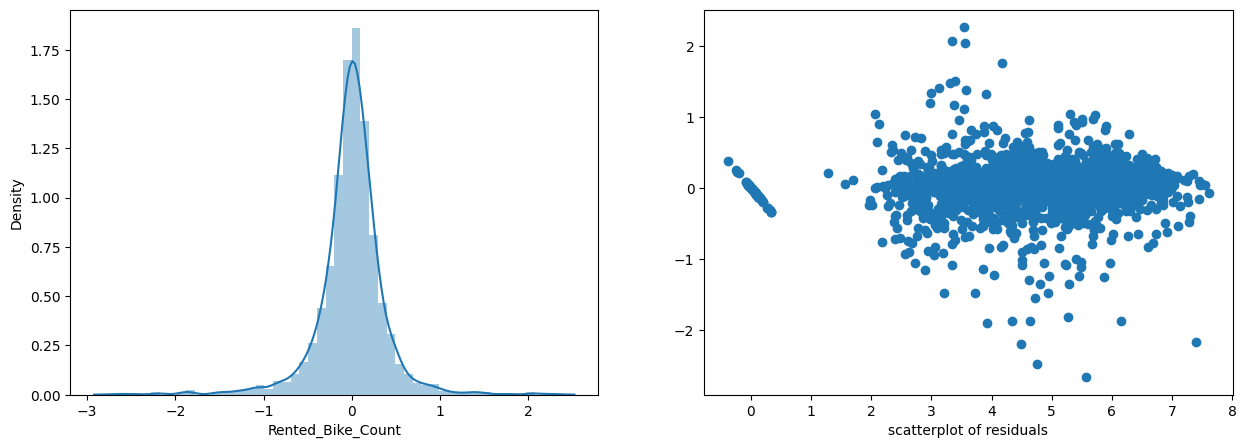

In [88]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **Gradient Boosting with GridSearchCV Model** 
* **R2 score of Train data : 0.97** 
* **adjusted R2 score of Train data : 0.97**
* **R2 score of Test data : 0.94** 
* **adjusted R2 score of Test data : 0.94**
* **Performance of data: Best**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.

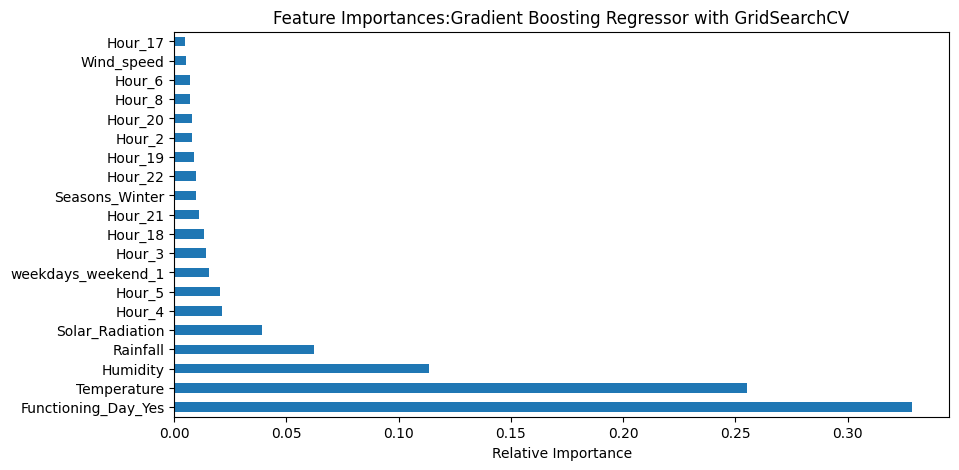

In [89]:
# Feature importances

gb_grid_feat_imp = pd.Series(gb_optimal_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances:Gradient Boosting Regressor with GridSearchCV')
plt.xlabel('Relative Importance')
gb_grid_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day, Temperature, and Humidity** has much **higher relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **Gradient Boosting with GridSearchCV model.**



##**XgBoost with RandomizedSearchCV**

In [90]:
#Import Library
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [91]:
#hyperparameter optimization
params = {'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,15],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.7]
} 

In [92]:
xgb_regressor = xgboost.XGBRegressor()
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [93]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [94]:
xgb_model = random_search.best_estimator_
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [96]:
#get the y predicted value for train and test dataset
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

In [97]:
#Calculating metric value for testing dataset
print('Metric value of training dataset')
#Calculate MSE
MSE_xgb = mean_squared_error(y_train, y_pred_train)    
print("MSE :",MSE_xgb)
#calculate RMSE 
RMSE_xgb = np.sqrt(MSE_xgb)   
print("RMSE :",RMSE_xgb)
#calculate MAE 
MAE_xgb = mean_absolute_error(y_train, y_pred_train)       
print("MAE :",MAE_xgb)
#calculate r2 and adjusted r2
r2_xgb = r2_score(y_train, y_pred_train)         
print("R2 :",r2_xgb)
Adjusted_r2_xgb = 1-(((1-r2_xgb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_xgb)
#creating table of metric values
dict1={'Model':'XgBoost Regressor with RandomisedSearchCV',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_r2_xgb),3)
        }
training_df = training_df.append(dict1,ignore_index=True)

#Calculating metric value for testing dataset
#calculate MSE
print('Metric value of testing dataset')
MSE_xgb = mean_squared_error(y_test, y_pred_test)    
print("MSE :",MSE_xgb)
#calculate RMSE 
RMSE_xgb = np.sqrt(MSE_xgb)   
print("RMSE :",RMSE_xgb)
#calculate MAE 
MAE_xgb = mean_absolute_error(y_test, y_pred_test)       
print("MAE :",MAE_xgb)
#calculate r2 and adjusted r2
r2_xgb = r2_score(y_test, y_pred_test)         
print("R2 :",r2_xgb)
Adjusted_r2_xgb = 1-(((1-r2_xgb)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",Adjusted_r2_xgb)
#creating table of metric values
dict2={'Model':'XgBoost Regressor with RandomisedSearchCV',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_r2_xgb),3)
        }
testing_df = testing_df.append(dict2,ignore_index=True)

Metric value of training dataset
MSE : 0.06587302366765437
RMSE : 0.2566574052460875
MAE : 0.18210504479878345
R2 : 0.9704487073348115
Adjusted R2 : 0.9696514290576275
Metric value of testing dataset
MSE : 0.14362695516138857
RMSE : 0.37898147073622024
MAE : 0.2506203463005331
R2 : 0.9392686302961699
Adjusted R2 : 0.937630129999175


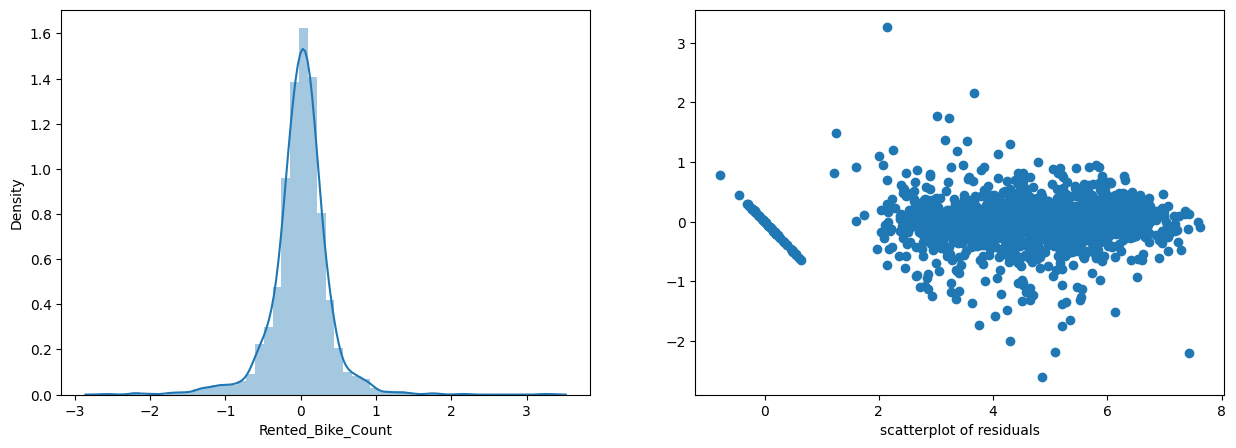

In [98]:
#Heteroscedasticity
Heteroscedasticity(y_test,y_pred_test)

* **XgBoost with RandomisedSearchCV Model** 
* **R2 score of Train data : 0.97** 
* **adjusted R2 score of Train data : 0.97**
* **R2 score of Test data : 0.93** 
* **adjusted R2 score of Test data : 0.93**
* **Performance of data: Best**
* To satisfy the regression assumptions and be able to trust the results, **the residuals should have a constant variance**.

In [99]:
# Feature importances

xgb_grid_feat_imp = pd.Series(xgb_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances:Gradient Boosting Regressor with GridSearchCV')
plt.xlabel('Relative Importance')
xgb_grid_feat_imp.nlargest(20).plot(kind='barh');

Here, we can see that, **Functioning Day has highest relevance** on the counting of bike Renting. means they are most important features which affects on rented bike count in the **XgBoost with RandomizedSearchCV model.**

#**9. Results**

In [100]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,testing_df],keys=['Training set','Testing set'],axis=1)
result

Training set                       \
                                           Model    MAE    MSE   RMSE   
0             Linear regression of train dataset  0.410  0.309  0.556   
1                               Ridge Regression  0.410  0.309  0.556   
2                       Decision Tree Regression  0.136  0.051  0.226   
3                                  Random Forest  0.083  0.018  0.134   
4                    Gradient Boosting Regressor  0.346  0.209  0.457   
5  Gradient Boosting Regressor with GridSearchCV  0.171  0.068  0.260   
6      XgBoost Regressor with RandomisedSearchCV  0.182  0.066  0.257   

                                                          Testing set         \
  R2_score Adjusted R2                                          Model    MAE   
0    0.861       0.857              Linear regression of test dataset  0.413   
1    0.861       0.858                               Ridge Regression  0.412   
2    0.977       0.977                       Decision Tree Regression  0.312   
3    0.992       0.992                                  Random Forest  0.234   
4    0.906       0.904                    Gradient Boosting Regressor  0.364   
5    0.970       0.969  Gradient Boosting Regressor with GridSearchCV  0.239   
6    0.970       0.970      XgBoost Regressor with RandomisedSearchCV  0.251   

                                      
     MSE   RMSE R2_score Adjusted R2  
0  0.313  0.560    0.868       0.864  
1  0.313  0.560    0.868       0.864  
2  0.255  0.505    0.892       0.889  
3  0.153  0.391    0.935       0.933  
4  0.237  0.487    0.900       0.897  
5  0.139  0.373    0.941       0.939  
6  0.144  0.379    0.939       0.938

• **No overfitting** is seen.

• **Random forest Regressor, Gradient Boosting gridsearchcv, XbBoost Regressor with GridSearchCV** gives the highest R2 score.

• Feature Importance value for Random Forest, Gradient Boosting, XgBoost are different.

• We can deploy **Random Forest, Gradient Boosting with GridSearchCV, XgBoost with RandomizedSearchCV** model.

#**10. Model Explainability by LIME**

In [101]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [102]:
# Putting features into respective float, cat , int list.
for i in x.columns:
    if x[i].dtype == 'float' : 
        float_columns.append(i)
    elif x[i].dtype == 'int64':
        int_columns.append(i)
    elif x[i].dtype == 'object':
        cat_columns.append(i)

In [103]:
train_cat_features = x[cat_columns]
train_float_features = x[float_columns]
train_int_features = x[int_columns]

In [104]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=d171ec0991ad48dffd5ec56d2a6c7cabbc4742bbca8d39d075a02645dfd21e21
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [105]:
import lime
import lime.lime_tabular
from __future__ import print_function

In [106]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(feature_names = x.columns,
                                                  training_data = np.array(x_train),
                                                  mode='regression')

In [107]:
# Get the explanation for RandomForest
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = rf_model.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,weekdays_weekend, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 8, Hour 6,Hour 20 has negative impact** on rented bike count for **Random Forest Model on 24th observation**.

In [108]:
# Get the explanation for Gradient Boosting with GridSearchCV
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = gradient_boosting_gridsearchcv.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,Hour 2, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 8, Hour 21,Hour 19 has negative impact** on rented bike count for **Gradient Boosting with GridSearchCV Model on 24th observation**.

In [109]:
# Get the explanation for XGBoost with GridSearchCV
exp = explainer.explain_instance(data_row = x_test.iloc[24], predict_fn = xgb_model.predict)
exp.show_in_notebook(show_table=True)

From LIME black box model, we can see that, **Hour 4,Hour 5,Hour 3,Hour 2,Winter Season, Rainfall has positive impact** and **Hour 18,Hour 19, Hour 21,Hour 20 has negative impact** on rented bike count for **XgBoost with GridSearchCV Model on 24th observation**.

#**11. Summary and conclusions**

###**EDA Summary**
* **Count of Rented Bike(dependent variable) : positively skewed**
* **Normally distributed attributes:** 
              - Temperature
              - Humidity.
* **Positively skewed attributes:** 
              - Wind 
              - Solar Radiation 
              - Snowfall 
              - Rainfall
* **Negatively skewed attributes:** 
              - visibility
* **positively correlated variables to the bike rent are :** 
              - Temperature
              - Dew Point Temperature
              - Solar Radiation
              - Hour

* **And most negatively correlated variables are:**
              - Humidity
              - Rainfall
              - Weekdays or Weekends
* The number of bikes rented is on average higher during the rush hours.i.e. at 6 p.m. to 8 p.m.
* The **rented bike counts is higher during the summer and lowest during the winter**.
* The **rented bike count is higher on working days than on non-working days**.
* On a **non-functioning day, no bikes are rented** in all the instances of the data.
* The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday, and on average, the **rented bike counts is lower on weekends than on weekdays**.
* On regular days, the demand for the bikes is higher during rush hours. **On holidays or weekends, the demand is comparatively lower in the mornings, and is higher in the afternoons**.

**Conclusion after using different models:**

      - No overfitting is seen.
      - Random forest Regressor, Gradient Boosting gridsearchcv, XbBoost Regressor with GridSearchCV gives the highest R2 score .
      - Feature Importance value for Random Forest, Gradient Boosting, XgBoost are different.
      - We can deploy Random Forest, Gradient Boosting with  GridSearchCV, XgBoost with RandomizedSearchCV model.

**Important Feature which affect the most in the rented bike count:**

    * Functioning Day
    * Winter Season
    * 18th Hour i.e. 6 p.m.
    * Temperature
    * Humidity

**Features wich impact Negatively on Rented Bike Count:**  

    * Hour 4 i.e. 4 a.m.
    * Hour 5 i.e. 5 a.m.
    * Hour 3 i.e. 3 a.m.
    * Winter Season 
    * Rainfall 
    * weekdays_weekend

**Features wich impact Positively on Rented Bike Count:**

    * Hour 18 i.e. 6 p.m.
    * Hour 19 i.e. 7 p.m.
    * Hour 8 i.e. 8 a.m.
    * Hour 21 i.e. 9 p.m.
    * Hour 20  i.e. 8 p.m.



However, this is not the ultimate end. As **this data is time dependent**, the values of features like **Temperature, Windspeed, Solar Radiation etc., will not always be consistent.** Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.